## 1. TotalSegmentator: Segmentierung + Maske + Visualisierung

In [2]:
import os
import numpy as np
import nibabel as nib
import matplotlib.pyplot as plt
import cv2
import gc
import logging
from tqdm import tqdm
from totalsegmentator.python_api import totalsegmentator

# Configure logging
logging.basicConfig(level=logging.INFO, format="%(asctime)s - %(levelname)s - %(message)s")

# Ordnerpfade
images_dir = "data/Spleen/output_images"   # Input NIfTI images
visualization_dir = "data/Spleen/segmentation_total_segmentator_results"
mask_dir = "data/Spleen/segmentation_total_segmentator_results"
os.makedirs(visualization_dir, exist_ok=True)
os.makedirs(mask_dir, exist_ok=True)

# Segmentierung + Maske + Visualisierung erstellen
def segment_and_save(images_dir, visualization_dir, mask_dir, organ_label="spleen"):
    image_files = sorted(os.listdir(images_dir))

    for image_file in tqdm(image_files, desc="Processing files"):
        image_path = os.path.join(images_dir, image_file)

        if not (image_file.endswith(".nii") or image_file.endswith(".nii.gz")):
            continue

        # Temporärer Ordner für Segmentierung
        temp_output = "data\\Spleen\\temp_segmentations"
        os.makedirs(temp_output, exist_ok=True)

        # TotalSegmentator ausführen
        totalsegmentator(
            input=image_path,
            output=temp_output,
            roi_subset=[organ_label],
            fast=True
        )

        # Nifti Dateien laden
        nii_img = nib.load(image_path)
        image_data = nii_img.get_fdata()

        seg_path = os.path.join(temp_output, f"{organ_label}.nii.gz")
        if not os.path.exists(seg_path):
            logging.warning(f"Keine Segmentierung für {image_file} gefunden.")
            continue

        nii_seg = nib.load(seg_path)
        seg_data = nii_seg.get_fdata()

        total_slices = image_data.shape[2]

        for slice_idx in range(total_slices):
            img_slice = image_data[:, :, slice_idx]
            seg_slice = seg_data[:, :, slice_idx]

            # Binäre Maske erstellen
            seg_mask = (seg_slice > 0).astype(np.uint8)

            # 1. Visualisierung speichern
            fig, ax = plt.subplots(1, 2, figsize=(12, 6))
            ax[0].imshow(img_slice, cmap="gray")
            ax[0].set_title(f"Original Slice {slice_idx}")
            ax[0].axis('off')
            ax[1].imshow(img_slice, cmap="gray")
            ax[1].imshow(seg_slice, cmap="jet", alpha=0.5)
            ax[1].set_title(f"Segmentierung Slice {slice_idx}")
            ax[1].axis('off')

            vis_save_path = os.path.join(visualization_dir, f"{image_file}_slice_{slice_idx}_visualization.png")
            plt.savefig(vis_save_path, bbox_inches="tight")
            plt.close(fig)

            # 2. Binäre Maske separat speichern
            mask_save_path = os.path.join(mask_dir, f"{image_file}_slice_{slice_idx}_segmentation.png")
            cv2.imwrite(mask_save_path, seg_mask * 255)

            gc.collect()

        # Temporäre Segmentierungsdateien löschen
        for f in os.listdir(temp_output):
            os.remove(os.path.join(temp_output, f))
        os.rmdir(temp_output)

# %% Ausführen
segment_and_save(images_dir, visualization_dir, mask_dir)


Processing files:   0%|                                                                         | 0/41 [00:00<?, ?it/s]

No GPU detected. Running on CPU. This can be very slow. The '--fast' or the `--roi_subset` option can help to reduce runtime.

If you use this tool please cite: https://pubs.rsna.org/doi/10.1148/ryai.230024

Using 'fast' option: resampling to lower resolution (3mm)
Generating rough segmentation for cropping...
Resampling...
  Resampled in 0.25s
Predicting...



100%|████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:07<00:00,  1.84s/it]


  Predicted in 26.98s
Resampling...
  cropping from (512, 512, 17) to (140, 159, 17)
Resampling...
  Resampled in 0.04s
Predicting...



100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:14<00:00, 14.04s/it]


  Predicted in 37.62s
Resampling...
Saving segmentations...
  Saved in 12.38s


Processing files:   2%|█▌                                                             | 1/41 [01:36<1:04:30, 96.77s/it]

No GPU detected. Running on CPU. This can be very slow. The '--fast' or the `--roi_subset` option can help to reduce runtime.

If you use this tool please cite: https://pubs.rsna.org/doi/10.1148/ryai.230024

Using 'fast' option: resampling to lower resolution (3mm)
Generating rough segmentation for cropping...
Resampling...
  Resampled in 0.88s
Predicting...



100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:01<00:00,  1.86s/it]


  Predicted in 21.52s
Resampling...
  cropping from (512, 512, 80) to (198, 215, 80)
Resampling...
  Resampled in 0.28s
Predicting...



100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:12<00:00, 12.14s/it]


  Predicted in 37.02s
Resampling...
Saving segmentations...
  Saved in 14.41s


Processing files:   5%|███                                                           | 2/41 [04:06<1:22:57, 127.63s/it]

No GPU detected. Running on CPU. This can be very slow. The '--fast' or the `--roi_subset` option can help to reduce runtime.

If you use this tool please cite: https://pubs.rsna.org/doi/10.1148/ryai.230024

Using 'fast' option: resampling to lower resolution (3mm)
Generating rough segmentation for cropping...
Resampling...
  Resampled in 0.47s
Predicting...



100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:01<00:00,  1.68s/it]


  Predicted in 20.07s
Resampling...
  cropping from (512, 512, 40) to (183, 200, 40)
Resampling...
  Resampled in 0.08s
Predicting...



100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:11<00:00, 11.57s/it]


  Predicted in 33.84s
Resampling...
Saving segmentations...
  Saved in 13.44s


Processing files:   7%|████▌                                                         | 3/41 [05:51<1:14:31, 117.67s/it]

No GPU detected. Running on CPU. This can be very slow. The '--fast' or the `--roi_subset` option can help to reduce runtime.

If you use this tool please cite: https://pubs.rsna.org/doi/10.1148/ryai.230024

Using 'fast' option: resampling to lower resolution (3mm)
Generating rough segmentation for cropping...
Resampling...
  Resampled in 0.33s
Predicting...



100%|████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:07<00:00,  1.86s/it]


  Predicted in 30.23s
Resampling...
  cropping from (512, 512, 21) to (181, 202, 21)
Resampling...
  Resampled in 0.09s
Predicting...



100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:10<00:00, 10.90s/it]


  Predicted in 31.25s
Resampling...
Saving segmentations...
  Saved in 13.70s


Processing files:  10%|██████                                                        | 4/41 [07:26<1:07:02, 108.71s/it]

No GPU detected. Running on CPU. This can be very slow. The '--fast' or the `--roi_subset` option can help to reduce runtime.

If you use this tool please cite: https://pubs.rsna.org/doi/10.1148/ryai.230024

Using 'fast' option: resampling to lower resolution (3mm)
Generating rough segmentation for cropping...
Resampling...
  Resampled in 0.17s
Predicting...



100%|████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:07<00:00,  1.92s/it]


  Predicted in 29.01s
Resampling...
  cropping from (512, 512, 11) to (172, 157, 11)
Resampling...
  Resampled in 0.03s
Predicting...



100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:12<00:00, 12.46s/it]


  Predicted in 34.64s
Resampling...
Saving segmentations...
  Saved in 11.77s


Processing files:  12%|███████▌                                                      | 5/41 [08:54<1:00:47, 101.31s/it]

No GPU detected. Running on CPU. This can be very slow. The '--fast' or the `--roi_subset` option can help to reduce runtime.

If you use this tool please cite: https://pubs.rsna.org/doi/10.1148/ryai.230024

Using 'fast' option: resampling to lower resolution (3mm)
Generating rough segmentation for cropping...
Resampling...
  Resampled in 0.49s
Predicting...



100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:02<00:00,  2.08s/it]


  Predicted in 20.28s
Resampling...
  cropping from (512, 512, 28) to (184, 254, 28)
Resampling...
  Resampled in 0.07s
Predicting...



100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:11<00:00, 11.29s/it]


  Predicted in 31.41s
Resampling...
Saving segmentations...
  Saved in 12.54s


Processing files:  15%|█████████▌                                                       | 6/41 [10:26<57:03, 97.83s/it]

No GPU detected. Running on CPU. This can be very slow. The '--fast' or the `--roi_subset` option can help to reduce runtime.

If you use this tool please cite: https://pubs.rsna.org/doi/10.1148/ryai.230024

Using 'fast' option: resampling to lower resolution (3mm)
Generating rough segmentation for cropping...
Resampling...
  Resampled in 0.70s
Predicting...



100%|████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:10<00:00,  2.58s/it]


  Predicted in 33.81s
Resampling...
  cropping from (512, 512, 61) to (152, 133, 61)
Resampling...
  Resampled in 0.09s
Predicting...



100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:12<00:00, 12.98s/it]


  Predicted in 35.53s
Resampling...
Saving segmentations...
  Saved in 14.53s


Processing files:  17%|██████████▌                                                   | 7/41 [12:49<1:03:50, 112.66s/it]

No GPU detected. Running on CPU. This can be very slow. The '--fast' or the `--roi_subset` option can help to reduce runtime.

If you use this tool please cite: https://pubs.rsna.org/doi/10.1148/ryai.230024

Using 'fast' option: resampling to lower resolution (3mm)
Generating rough segmentation for cropping...
Resampling...
  Resampled in 0.25s
Predicting...



100%|████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:07<00:00,  1.99s/it]


  Predicted in 28.32s
Resampling...
  cropping from (512, 512, 18) to (165, 226, 18)
Resampling...
  Resampled in 0.06s
Predicting...



100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:12<00:00, 12.45s/it]


  Predicted in 35.11s
Resampling...
Saving segmentations...
  Saved in 14.78s


Processing files:  20%|████████████▍                                                   | 8/41 [14:27<59:25, 108.03s/it]

No GPU detected. Running on CPU. This can be very slow. The '--fast' or the `--roi_subset` option can help to reduce runtime.

If you use this tool please cite: https://pubs.rsna.org/doi/10.1148/ryai.230024

Using 'fast' option: resampling to lower resolution (3mm)
Generating rough segmentation for cropping...
Resampling...
  Resampled in 0.27s
Predicting...



100%|████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:09<00:00,  2.33s/it]


  Predicted in 31.09s
Resampling...
  cropping from (512, 512, 20) to (187, 172, 20)
Resampling...
  Resampled in 0.13s
Predicting...



100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:16<00:00, 16.78s/it]


  Predicted in 48.28s
Resampling...
Saving segmentations...
  Saved in 20.14s


Processing files:  22%|█████████████▌                                                | 9/41 [16:36<1:01:06, 114.57s/it]

No GPU detected. Running on CPU. This can be very slow. The '--fast' or the `--roi_subset` option can help to reduce runtime.

If you use this tool please cite: https://pubs.rsna.org/doi/10.1148/ryai.230024

Using 'fast' option: resampling to lower resolution (3mm)
Generating rough segmentation for cropping...
Resampling...
  Resampled in 0.94s
Predicting...



100%|████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:09<00:00,  2.44s/it]


  Predicted in 37.70s
Resampling...
  cropping from (512, 512, 72) to (159, 139, 72)
Resampling...
  Resampled in 0.13s
Predicting...



100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:16<00:00, 16.88s/it]


  Predicted in 49.74s
Resampling...
Saving segmentations...
  Saved in 24.20s


Processing files:  24%|██████████████▉                                              | 10/41 [20:10<1:15:02, 145.23s/it]

No GPU detected. Running on CPU. This can be very slow. The '--fast' or the `--roi_subset` option can help to reduce runtime.

If you use this tool please cite: https://pubs.rsna.org/doi/10.1148/ryai.230024

Using 'fast' option: resampling to lower resolution (3mm)
Generating rough segmentation for cropping...
Resampling...
  Resampled in 0.44s
Predicting...



100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:02<00:00,  2.50s/it]


  Predicted in 34.56s
Resampling...
  cropping from (512, 512, 35) to (163, 163, 35)
Resampling...
  Resampled in 0.10s
Predicting...



100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:15<00:00, 15.95s/it]


  Predicted in 47.21s
Resampling...
Saving segmentations...
  Saved in 23.09s


Processing files:  27%|████████████████▎                                            | 11/41 [22:43<1:13:52, 147.76s/it]

No GPU detected. Running on CPU. This can be very slow. The '--fast' or the `--roi_subset` option can help to reduce runtime.

If you use this tool please cite: https://pubs.rsna.org/doi/10.1148/ryai.230024

Using 'fast' option: resampling to lower resolution (3mm)
Generating rough segmentation for cropping...
Resampling...
  Resampled in 1.51s
Predicting...



100%|████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:08<00:00,  2.06s/it]


  Predicted in 42.28s
Resampling...
  cropping from (512, 512, 69) to (128, 152, 69)
Resampling...
  Resampled in 0.12s
Predicting...



100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:14<00:00, 14.37s/it]


  Predicted in 47.25s
Resampling...
Saving segmentations...
  Saved in 19.24s


Processing files:  27%|████████████████▎                                            | 11/41 [25:41<1:10:02, 140.10s/it]


KeyboardInterrupt: 

In [1]:
# -*- coding: utf-8 -*-
import os
import json
import time
import csv
import gc
import logging
from typing import Optional, Tuple

import numpy as np
import nibabel as nib
import matplotlib.pyplot as plt
import cv2
from tqdm import tqdm
from totalsegmentator.python_api import totalsegmentator

# ========================= Logging =========================
logging.basicConfig(level=logging.INFO, format="%(asctime)s - %(levelname)s - %(message)s")

# =================== Helper: Zeitformat & CSV-Summe ===================
def _fmt(sec: float) -> str:
    h, r = divmod(sec, 3600)
    m, s = divmod(r, 60)
    return f"{int(h):02d}:{int(m):02d}:{s:05.2f}"

def _sum_seconds_from_csv(csv_path: str) -> float:
    """
    Summiert die Spalte 'seconds' aus timing_per_slice.csv über alle Runs.
    Robuste Auswertung ohne pandas.
    """
    if not os.path.exists(csv_path):
        return 0.0
    total = 0.0
    try:
        with open(csv_path, "r", encoding="utf-8") as f:
            reader = csv.DictReader(f)
            if not reader.fieldnames or "seconds" not in reader.fieldnames:
                return 0.0
            for row in reader:
                try:
                    total += float(row["seconds"])
                except Exception:
                    continue
    except Exception as e:
        logging.warning(f"Konnte CSV nicht auswerten ({csv_path}): {e}")
    return total

# =================== Laufzeit-Status (akkumuliert) ===================
def _load_runtime_state(state_path: str) -> dict:
    if os.path.exists(state_path):
        try:
            with open(state_path, "r", encoding="utf-8") as f:
                return json.load(f)
        except Exception as e:
            logging.warning(f"Konnte Runtime-State nicht lesen: {e}")
    return {"sessions": [], "total_elapsed_sec": 0.0}

def _save_runtime_state(state_path: str, state: dict):
    with open(state_path, "w", encoding="utf-8") as f:
        json.dump(state, f, indent=2)

def time_run_accumulate(func, state_path: str, seed_timing_csv: str, *args, **kwargs):
    """
    Führt func aus, misst Laufzeit des aktuellen Runs und akkumuliert in state_path.
    Zusätzlich wird am Ende die *echte* Gesamtlaufzeit über alle Neustarts
    aus timing_per_slice.csv (seed_timing_csv) berechnet und geloggt.
    """
    state = _load_runtime_state(state_path)
    start = time.perf_counter()
    start_wall = time.time()
    logging.info("==== Starte Laufzeitmessung (akkumuliert) ====")
    try:
        return func(*args, **kwargs)
    finally:
        elapsed = time.perf_counter() - start
        end_wall = time.time()
        state["sessions"].append({"start": start_wall, "end": end_wall, "elapsed_sec": elapsed})
        state["total_elapsed_sec"] = float(state.get("total_elapsed_sec", 0.0)) + float(elapsed)
        _save_runtime_state(state_path, state)

        msg1 = f"Aktueller Run: {_fmt(elapsed)} | Akkumuliert (Wall-Clock): {_fmt(state['total_elapsed_sec'])}"
        logging.info(msg1)

        total_csv_sec = _sum_seconds_from_csv(seed_timing_csv)
        msg2 = f"Akkumulierte Gesamtlaufzeit (aus CSV, alle Neustarts): {_fmt(total_csv_sec)}"
        logging.info(msg2)

        with open("runtime_log.txt", "a", encoding="utf-8") as f:
            f.write(msg1 + "\n")
            f.write(msg2 + "\n")

# =================== Resume-Checkpoint ===================
def save_resume_state(checkpoint_path: str, filename: str, slice_idx: int):
    state = {"resume_file": filename, "resume_slice": slice_idx}
    with open(checkpoint_path, "w", encoding="utf-8") as f:
        json.dump(state, f)

def load_resume_state(checkpoint_path: str) -> Tuple[Optional[str], Optional[int]]:
    if os.path.exists(checkpoint_path):
        try:
            with open(checkpoint_path, "r", encoding="utf-8") as f:
                state = json.load(f)
            return state.get("resume_file"), state.get("resume_slice")
        except Exception as e:
            logging.warning(f"Checkpoint konnte nicht gelesen werden: {e}")
    return None, None

# =================== Visualisierung ===================
def _save_visualization(img_slice: np.ndarray, seg_slice: np.ndarray, save_path: str, title_prefix: str, slice_idx: int):
    fig, ax = plt.subplots(1, 2, figsize=(12, 6))
    ax[0].imshow(img_slice, cmap="gray")
    ax[0].set_title(f"{title_prefix} Slice {slice_idx}")
    ax[0].axis('off')
    ax[1].imshow(img_slice, cmap="gray")
    ax[1].imshow(seg_slice, cmap="jet", alpha=0.5)
    ax[1].set_title(f"Segmentierung Slice {slice_idx}")
    ax[1].axis('off')
    plt.savefig(save_path, bbox_inches="tight")
    plt.close(fig)

# =================== Pipeline: TotalSegmentator + Laufzeit (ein Ordner) ===================
def process_totalseg_with_runtime(
    images_dir: str,
    output_dir: str,
    checkpoint_path: str,
    timing_csv: str,
    organ_label: str = "spleen",
    use_auto_resume: bool = True,
    resume_file: Optional[str] = None,
    resume_slice: Optional[int] = None,
):
    """
    - Führt für jedes NIfTI-Volume TotalSegmentator (ROI-Subset) aus und erzeugt eine NIfTI-Segmentation.
    - Iteriert alle Slices, speichert Overlay-Visualisierung *und* binäre Maske als PNG in EINEM Ordner.
    - Schreibt VOR JEDEM Slice einen Resume-Checkpoint (Datei & Slice).
    - Hängt pro Slice die Laufzeit an timing_csv an (persistiert über Neustarts).
    Hinweis: Die eigentliche Segmentierung des Volumes erfolgt *einmal pro Datei* (nicht pro Slice).
    """
    os.makedirs(output_dir, exist_ok=True)

    # Auto-Resume aus JSON
    if use_auto_resume and (resume_file is None and resume_slice is None):
        cf, cs = load_resume_state(checkpoint_path)
        if cf is not None:
            logging.info(f"Automatischer Resume → Datei={cf}, Slice={cs}")
            resume_file, resume_slice = cf, cs

    # timing CSV initialisieren
    if not os.path.exists(timing_csv):
        with open(timing_csv, "w", newline="", encoding="utf-8") as fcsv:
            csv.writer(fcsv).writerow(["file", "slice_idx", "seconds"])

    nii_files = sorted([f for f in os.listdir(images_dir) if f.endswith((".nii", ".nii.gz"))])
    resume_armed = resume_file is None  # erst ab resume_file loslegen

    with tqdm(total=len(nii_files), desc="Dateien", unit="Datei") as prog_files:
        for image_file in nii_files:
            image_path = os.path.join(images_dir, image_file)

            if not resume_armed:
                if image_file == resume_file:
                    resume_armed = True
                else:
                    prog_files.update(1)
                    continue

            # Pro Datei: Temp-Output für Segmentierung
            temp_output = os.path.join(output_dir, "temp_segmentations")
            os.makedirs(temp_output, exist_ok=True)
            seg_path = os.path.join(temp_output, f"{organ_label}.nii.gz")

            # Segmentierung ausführen, falls nicht vorhanden
            if not os.path.exists(seg_path):
                logging.info(f"[{image_file}] Starte TotalSegmentator für ROI='{organ_label}'")
                try:
                    totalsegmentator(
                        input=image_path,
                        output=temp_output,
                        roi_subset=[organ_label],
                        fast=True
                    )
                except Exception as e:
                    logging.error(f"Fehler bei TotalSegmentator für {image_file}: {e}")
                    # Datei überspringen
                    prog_files.update(1)
                    continue
            else:
                logging.info(f"[{image_file}] Verwende vorhandene Segmentierung: {seg_path}")

            # Volumes laden
            try:
                nii_img = nib.load(image_path)
                image_data = nii_img.get_fdata()
                nii_seg = nib.load(seg_path)
                seg_data = nii_seg.get_fdata()
            except Exception as e:
                logging.error(f"Fehler beim Laden der NIfTI-Dateien ({image_file}): {e}")
                prog_files.update(1)
                continue

            total_slices = image_data.shape[2]
            slice_start = resume_slice if (image_file == resume_file and resume_slice is not None) else 0

            with tqdm(total=total_slices, desc=f"Slices in {image_file}", unit="Slice") as prog_slices:
                for slice_idx in range(slice_start, total_slices):
                    t0 = time.perf_counter()
                    try:
                        # Checkpoint VOR der Bearbeitung des Slices schreiben
                        save_resume_state(checkpoint_path, image_file, slice_idx)

                        img_slice = image_data[:, :, slice_idx]
                        seg_slice = seg_data[:, :, slice_idx]

                        # Binäre Maske
                        seg_mask = (seg_slice > 0).astype(np.uint8)

                        # 1) Visualisierung speichern
                        vis_save_path = os.path.join(
                            output_dir, f"{image_file}_slice_{slice_idx}_visualization.png"
                        )
                        _save_visualization(img_slice, seg_slice, vis_save_path, "Original", slice_idx)

                        # 2) Binäre Maske separat speichern (8-bit)
                        mask_save_path = os.path.join(
                            output_dir, f"{image_file}_slice_{slice_idx}_segmentation.png"
                        )
                        cv2.imwrite(mask_save_path, (seg_mask * 255).astype(np.uint8))

                        # Cleanup
                        gc.collect()

                    except Exception as e:
                        logging.error(f"Fehler bei {image_file} Slice {slice_idx}: {e}")
                    finally:
                        elapsed_slice = time.perf_counter() - t0
                        with open(timing_csv, "a", newline="", encoding="utf-8") as fcsv:
                            csv.writer(fcsv).writerow([image_file, slice_idx, f"{elapsed_slice:.4f}"])
                        prog_slices.update(1)

            # Temp-Segmentierungsdateien nach Abschluss der Datei entfernen
            try:
                if os.path.exists(seg_path):
                    os.remove(seg_path)
                for f in os.listdir(temp_output):
                    try:
                        os.remove(os.path.join(temp_output, f))
                    except Exception:
                        pass
                os.rmdir(temp_output)
            except Exception as e:
                logging.warning(f"Konnte Temp-Ordner nicht löschen ({temp_output}): {e}")

            prog_files.update(1)

    # Fertig → Checkpoint löschen
    if os.path.exists(checkpoint_path):
        os.remove(checkpoint_path)
        logging.info("Checkpoint entfernt (Pipeline abgeschlossen).")

# =================== AUSFÜHRUNG ===================
if __name__ == "__main__":
    # Eingabe & EIN gemeinsamer Ausgabeordner
    images_dir = os.path.join("data", "Spleen", "output_images")            # Input NIfTI images
    output_dir = os.path.join("data", "Spleen", "TotalSegmentator_Segmentation_results_with_run_time")  # Overlays + Masken

    os.makedirs(output_dir, exist_ok=True)

    # Runtime/Resume Artefakte im selben Ordner
    checkpoint_path = os.path.join(output_dir, "resume_checkpoint.json")
    timing_csv      = os.path.join(output_dir, "timing_per_slice.csv")
    runtime_state   = os.path.join(output_dir, "runtime_state.json")

    # Optionales manuelles Resume (sonst Auto-Resume)
    manual_resume_file  = None  # z.B. "spleen_63.nii.gz"
    manual_resume_slice = None  # z.B. 20

    # Lauf starten (Wall-Clock akkumuliert + CSV-basierte Gesamtzeit)
    time_run_accumulate(
        process_totalseg_with_runtime,
        runtime_state,                   # state_path
        seed_timing_csv=timing_csv,      # für Summen-Log am Ende
        images_dir=images_dir,
        output_dir=output_dir,
        checkpoint_path=checkpoint_path,
        timing_csv=timing_csv,           # Pflichtargument für Pipeline
        organ_label="spleen",
        use_auto_resume=True,
        resume_file=manual_resume_file,
        resume_slice=manual_resume_slice,
    )

    # Finales Log der CSV-Gesamtlaufzeit
    total_csv_sec = _sum_seconds_from_csv(timing_csv)
    logging.info(f"[FINAL] Gesamtlaufzeit aus CSV (alle Neustarts): {_fmt(total_csv_sec)}")


2025-09-10 16:08:42,028 - INFO - ==== Starte Laufzeitmessung (akkumuliert) ====
Dateien:   0%|                                                                               | 0/41 [00:00<?, ?Datei/s]2025-09-10 16:08:42,138 - INFO - [spleen_10.nii.gz] Starte TotalSegmentator für ROI='spleen'


No GPU detected. Running on CPU. This can be very slow. The '--fast' or the `--roi_subset` option can help to reduce runtime.

If you use this tool please cite: https://pubs.rsna.org/doi/10.1148/ryai.230024

Using 'fast' option: resampling to lower resolution (3mm)
Generating rough segmentation for cropping...
Resampling...
  Resampled in 0.53s
Predicting...



100%|████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:10<00:00,  2.59s/it]


  Predicted in 33.94s
Resampling...
  cropping from (512, 512, 17) to (146, 159, 17)
Resampling...
  Resampled in 0.08s
Predicting...



100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:17<00:00, 17.67s/it]


  Predicted in 52.39s
Resampling...
Saving segmentations...
  Saved in 17.44s



Dateien:   2%|█▋                                                                  | 1/41 [02:19<1:32:47, 139.18s/Datei]2025-09-10 16:11:01,306 - INFO - [spleen_12.nii.gz] Starte TotalSegmentator für ROI='spleen'


No GPU detected. Running on CPU. This can be very slow. The '--fast' or the `--roi_subset` option can help to reduce runtime.

If you use this tool please cite: https://pubs.rsna.org/doi/10.1148/ryai.230024

Using 'fast' option: resampling to lower resolution (3mm)
Generating rough segmentation for cropping...
Resampling...
  Resampled in 1.28s
Predicting...



100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:02<00:00,  2.17s/it]


  Predicted in 23.36s
Resampling...
  cropping from (512, 512, 80) to (198, 215, 80)
Resampling...
  Resampled in 0.28s
Predicting...



100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:16<00:00, 16.31s/it]


  Predicted in 44.02s
Resampling...
Saving segmentations...
  Saved in 15.41s



Dateien:   5%|███▎                                                                | 2/41 [04:55<1:37:08, 149.44s/Datei]2025-09-10 16:13:37,928 - INFO - [spleen_13.nii.gz] Starte TotalSegmentator für ROI='spleen'


No GPU detected. Running on CPU. This can be very slow. The '--fast' or the `--roi_subset` option can help to reduce runtime.

If you use this tool please cite: https://pubs.rsna.org/doi/10.1148/ryai.230024

Using 'fast' option: resampling to lower resolution (3mm)
Generating rough segmentation for cropping...
Resampling...
  Resampled in 0.90s
Predicting...



100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:03<00:00,  3.10s/it]


  Predicted in 31.36s
Resampling...
  cropping from (512, 512, 40) to (183, 200, 40)
Resampling...
  Resampled in 0.16s
Predicting...



100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:17<00:00, 17.21s/it]


  Predicted in 43.80s
Resampling...
Saving segmentations...
  Saved in 14.99s



Dateien:   7%|████▉                                                               | 3/41 [07:03<1:28:27, 139.68s/Datei]2025-09-10 16:15:46,365 - INFO - [spleen_14.nii.gz] Starte TotalSegmentator für ROI='spleen'


No GPU detected. Running on CPU. This can be very slow. The '--fast' or the `--roi_subset` option can help to reduce runtime.

If you use this tool please cite: https://pubs.rsna.org/doi/10.1148/ryai.230024

Using 'fast' option: resampling to lower resolution (3mm)
Generating rough segmentation for cropping...
Resampling...
  Resampled in 0.64s
Predicting...



100%|████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:06<00:00,  1.73s/it]


  Predicted in 26.97s
Resampling...
  cropping from (512, 512, 21) to (181, 202, 21)
Resampling...
  Resampled in 0.14s
Predicting...



100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:12<00:00, 12.81s/it]


  Predicted in 38.24s
Resampling...
Saving segmentations...
  Saved in 12.94s



Dateien:  10%|██████▋                                                             | 4/41 [08:43<1:16:20, 123.80s/Datei]2025-09-10 16:17:25,435 - INFO - [spleen_16.nii.gz] Starte TotalSegmentator für ROI='spleen'


No GPU detected. Running on CPU. This can be very slow. The '--fast' or the `--roi_subset` option can help to reduce runtime.

If you use this tool please cite: https://pubs.rsna.org/doi/10.1148/ryai.230024

Using 'fast' option: resampling to lower resolution (3mm)
Generating rough segmentation for cropping...
Resampling...
  Resampled in 0.44s
Predicting...



100%|████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:06<00:00,  1.69s/it]


  Predicted in 27.52s
Resampling...
  cropping from (512, 512, 11) to (172, 157, 11)
Resampling...
  Resampled in 0.08s
Predicting...



100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:09<00:00,  9.25s/it]


  Predicted in 31.48s
Resampling...
Saving segmentations...
  Saved in 12.75s



Dateien:  12%|████████▎                                                           | 5/41 [10:05<1:05:21, 108.93s/Datei]2025-09-10 16:18:48,002 - INFO - [spleen_17.nii.gz] Starte TotalSegmentator für ROI='spleen'


No GPU detected. Running on CPU. This can be very slow. The '--fast' or the `--roi_subset` option can help to reduce runtime.

If you use this tool please cite: https://pubs.rsna.org/doi/10.1148/ryai.230024

Using 'fast' option: resampling to lower resolution (3mm)
Generating rough segmentation for cropping...
Resampling...
  Resampled in 0.60s
Predicting...



100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:01<00:00,  1.97s/it]


  Predicted in 21.08s
Resampling...
  cropping from (512, 512, 28) to (184, 254, 28)
Resampling...
  Resampled in 0.15s
Predicting...



100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:08<00:00,  8.97s/it]


  Predicted in 29.98s
Resampling...
Saving segmentations...
  Saved in 13.57s



Dateien:  15%|██████████▏                                                           | 6/41 [11:35<59:39, 102.28s/Datei]2025-09-10 16:20:17,392 - INFO - [spleen_18.nii.gz] Starte TotalSegmentator für ROI='spleen'


No GPU detected. Running on CPU. This can be very slow. The '--fast' or the `--roi_subset` option can help to reduce runtime.

If you use this tool please cite: https://pubs.rsna.org/doi/10.1148/ryai.230024

Using 'fast' option: resampling to lower resolution (3mm)
Generating rough segmentation for cropping...
Resampling...
  Resampled in 1.01s
Predicting...



100%|████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:07<00:00,  1.77s/it]


  Predicted in 26.28s
Resampling...
  cropping from (512, 512, 61) to (152, 133, 61)
Resampling...
  Resampled in 0.12s
Predicting...



100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:09<00:00,  9.80s/it]


  Predicted in 39.59s
Resampling...
Saving segmentations...
  Saved in 19.81s



Dateien:  17%|███████████▌                                                        | 7/41 [13:56<1:05:13, 115.12s/Datei]2025-09-10 16:22:39,299 - INFO - [spleen_19.nii.gz] Starte TotalSegmentator für ROI='spleen'


No GPU detected. Running on CPU. This can be very slow. The '--fast' or the `--roi_subset` option can help to reduce runtime.

If you use this tool please cite: https://pubs.rsna.org/doi/10.1148/ryai.230024

Using 'fast' option: resampling to lower resolution (3mm)
Generating rough segmentation for cropping...
Resampling...
  Resampled in 0.52s
Predicting...



100%|████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:06<00:00,  1.71s/it]


  Predicted in 26.51s
Resampling...
  cropping from (512, 512, 18) to (165, 226, 18)
Resampling...
  Resampled in 0.14s
Predicting...



100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:12<00:00, 12.37s/it]


  Predicted in 35.13s
Resampling...
Saving segmentations...
  Saved in 13.10s



Dateien:  20%|█████████████▋                                                        | 8/41 [15:31<59:41, 108.52s/Datei]2025-09-10 16:24:13,694 - INFO - [spleen_2.nii.gz] Starte TotalSegmentator für ROI='spleen'


No GPU detected. Running on CPU. This can be very slow. The '--fast' or the `--roi_subset` option can help to reduce runtime.

If you use this tool please cite: https://pubs.rsna.org/doi/10.1148/ryai.230024

Using 'fast' option: resampling to lower resolution (3mm)
Generating rough segmentation for cropping...
Resampling...
  Resampled in 0.52s
Predicting...



100%|████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:06<00:00,  1.69s/it]


  Predicted in 26.89s
Resampling...
  cropping from (512, 512, 20) to (187, 172, 20)
Resampling...
  Resampled in 0.11s
Predicting...



100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:11<00:00, 11.19s/it]


  Predicted in 36.97s
Resampling...
Saving segmentations...
  Saved in 13.06s



Dateien:  22%|███████████████▎                                                      | 9/41 [17:07<55:49, 104.67s/Datei]2025-09-10 16:25:49,526 - INFO - [spleen_20.nii.gz] Starte TotalSegmentator für ROI='spleen'


No GPU detected. Running on CPU. This can be very slow. The '--fast' or the `--roi_subset` option can help to reduce runtime.

If you use this tool please cite: https://pubs.rsna.org/doi/10.1148/ryai.230024

Using 'fast' option: resampling to lower resolution (3mm)
Generating rough segmentation for cropping...
Resampling...
  Resampled in 1.27s
Predicting...



100%|████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:06<00:00,  1.68s/it]


  Predicted in 26.41s
Resampling...
  cropping from (512, 512, 72) to (159, 139, 72)
Resampling...
  Resampled in 0.15s
Predicting...



100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:12<00:00, 12.52s/it]


  Predicted in 43.63s
Resampling...
Saving segmentations...
  Saved in 15.53s



Dateien:  24%|████████████████▎                                                  | 10/41 [19:39<1:01:35, 119.22s/Datei]2025-09-10 16:28:21,325 - INFO - [spleen_21.nii.gz] Starte TotalSegmentator für ROI='spleen'


No GPU detected. Running on CPU. This can be very slow. The '--fast' or the `--roi_subset` option can help to reduce runtime.

If you use this tool please cite: https://pubs.rsna.org/doi/10.1148/ryai.230024

Using 'fast' option: resampling to lower resolution (3mm)
Generating rough segmentation for cropping...
Resampling...
  Resampled in 0.68s
Predicting...



100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:01<00:00,  1.93s/it]


  Predicted in 22.20s
Resampling...
  cropping from (512, 512, 35) to (163, 163, 35)
Resampling...
  Resampled in 0.10s
Predicting...



100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:13<00:00, 13.91s/it]


  Predicted in 43.99s
Resampling...
Saving segmentations...
  Saved in 13.64s



Dateien:  27%|██████████████████▌                                                  | 11/41 [21:31<58:34, 117.15s/Datei]2025-09-10 16:30:14,158 - INFO - [spleen_22.nii.gz] Starte TotalSegmentator für ROI='spleen'


No GPU detected. Running on CPU. This can be very slow. The '--fast' or the `--roi_subset` option can help to reduce runtime.

If you use this tool please cite: https://pubs.rsna.org/doi/10.1148/ryai.230024

Using 'fast' option: resampling to lower resolution (3mm)
Generating rough segmentation for cropping...
Resampling...
  Resampled in 1.13s
Predicting...



100%|████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:06<00:00,  1.72s/it]


  Predicted in 27.37s
Resampling...
  cropping from (512, 512, 69) to (128, 152, 69)
Resampling...
  Resampled in 0.13s
Predicting...



100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:13<00:00, 13.89s/it]


  Predicted in 42.19s
Resampling...
Saving segmentations...
  Saved in 16.05s



Dateien:  29%|███████████████████▌                                               | 12/41 [24:05<1:02:01, 128.32s/Datei]2025-09-10 16:32:48,111 - INFO - [spleen_24.nii.gz] Starte TotalSegmentator für ROI='spleen'


No GPU detected. Running on CPU. This can be very slow. The '--fast' or the `--roi_subset` option can help to reduce runtime.

If you use this tool please cite: https://pubs.rsna.org/doi/10.1148/ryai.230024

Using 'fast' option: resampling to lower resolution (3mm)
Generating rough segmentation for cropping...
Resampling...
  Resampled in 0.42s
Predicting...



100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:02<00:00,  2.22s/it]


  Predicted in 22.46s
Resampling...
  cropping from (512, 512, 11) to (186, 145, 11)
Resampling...
  Resampled in 0.06s
Predicting...



100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:11<00:00, 11.32s/it]


  Predicted in 34.51s
Resampling...
Saving segmentations...
  Saved in 12.72s



Dateien:  32%|█████████████████████▉                                               | 13/41 [25:27<53:17, 114.20s/Datei]2025-09-10 16:34:09,726 - INFO - [spleen_25.nii.gz] Starte TotalSegmentator für ROI='spleen'


No GPU detected. Running on CPU. This can be very slow. The '--fast' or the `--roi_subset` option can help to reduce runtime.

If you use this tool please cite: https://pubs.rsna.org/doi/10.1148/ryai.230024

Using 'fast' option: resampling to lower resolution (3mm)
Generating rough segmentation for cropping...
Resampling...
  Resampled in 0.52s
Predicting...



100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:01<00:00,  1.94s/it]


  Predicted in 21.36s
Resampling...
  cropping from (512, 512, 22) to (174, 165, 22)
Resampling...
  Resampled in 0.10s
Predicting...



100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:09<00:00,  9.47s/it]


  Predicted in 32.57s
Resampling...
Saving segmentations...
  Saved in 13.32s



Dateien:  34%|███████████████████████▌                                             | 14/41 [26:55<47:54, 106.45s/Datei]2025-09-10 16:35:38,257 - INFO - [spleen_26.nii.gz] Starte TotalSegmentator für ROI='spleen'


No GPU detected. Running on CPU. This can be very slow. The '--fast' or the `--roi_subset` option can help to reduce runtime.

If you use this tool please cite: https://pubs.rsna.org/doi/10.1148/ryai.230024

Using 'fast' option: resampling to lower resolution (3mm)
Generating rough segmentation for cropping...
Resampling...
  Resampled in 0.45s
Predicting...



100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:01<00:00,  1.84s/it]


  Predicted in 23.13s
Resampling...
  cropping from (512, 512, 15) to (192, 175, 15)
Resampling...
  Resampled in 0.10s
Predicting...



100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:10<00:00, 10.14s/it]


  Predicted in 35.96s
Resampling...
Saving segmentations...
  Saved in 13.14s



Dateien:  37%|█████████████████████████▏                                           | 15/41 [28:22<43:36, 100.64s/Datei]2025-09-10 16:37:05,466 - INFO - [spleen_27.nii.gz] Starte TotalSegmentator für ROI='spleen'


No GPU detected. Running on CPU. This can be very slow. The '--fast' or the `--roi_subset` option can help to reduce runtime.

If you use this tool please cite: https://pubs.rsna.org/doi/10.1148/ryai.230024

Using 'fast' option: resampling to lower resolution (3mm)
Generating rough segmentation for cropping...
Resampling...
  Resampled in 0.49s
Predicting...



100%|████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:06<00:00,  1.68s/it]


  Predicted in 26.34s
Resampling...
  cropping from (512, 512, 19) to (184, 152, 19)
Resampling...
  Resampled in 0.10s
Predicting...



100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:09<00:00,  9.60s/it]


  Predicted in 31.51s
Resampling...
Saving segmentations...
  Saved in 12.75s



Dateien:  39%|███████████████████████████▎                                          | 16/41 [29:51<40:25, 97.00s/Datei]2025-09-10 16:38:33,637 - INFO - [spleen_28.nii.gz] Starte TotalSegmentator für ROI='spleen'


No GPU detected. Running on CPU. This can be very slow. The '--fast' or the `--roi_subset` option can help to reduce runtime.

If you use this tool please cite: https://pubs.rsna.org/doi/10.1148/ryai.230024

Using 'fast' option: resampling to lower resolution (3mm)
Generating rough segmentation for cropping...
Resampling...
  Resampled in 0.47s
Predicting...



100%|████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:06<00:00,  1.68s/it]


  Predicted in 26.37s
Resampling...
  cropping from (512, 512, 14) to (139, 126, 14)
Resampling...
  Resampled in 0.06s
Predicting...



100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:08<00:00,  8.96s/it]


  Predicted in 36.19s
Resampling...
Saving segmentations...
  Saved in 14.34s



Dateien:  41%|█████████████████████████████                                         | 17/41 [31:22<38:06, 95.28s/Datei]2025-09-10 16:40:04,919 - INFO - [spleen_29.nii.gz] Starte TotalSegmentator für ROI='spleen'


No GPU detected. Running on CPU. This can be very slow. The '--fast' or the `--roi_subset` option can help to reduce runtime.

If you use this tool please cite: https://pubs.rsna.org/doi/10.1148/ryai.230024

Using 'fast' option: resampling to lower resolution (3mm)
Generating rough segmentation for cropping...
Resampling...
  Resampled in 0.63s
Predicting...



100%|████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:07<00:00,  1.77s/it]


  Predicted in 27.83s
Resampling...
  cropping from (512, 512, 20) to (153, 145, 20)
Resampling...
  Resampled in 0.09s
Predicting...



100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:09<00:00,  9.37s/it]


  Predicted in 34.38s
Resampling...
Saving segmentations...
  Saved in 12.95s



Dateien:  44%|██████████████████████████████▋                                       | 18/41 [33:00<36:49, 96.06s/Datei]2025-09-10 16:41:42,777 - INFO - [spleen_3.nii.gz] Starte TotalSegmentator für ROI='spleen'


No GPU detected. Running on CPU. This can be very slow. The '--fast' or the `--roi_subset` option can help to reduce runtime.

If you use this tool please cite: https://pubs.rsna.org/doi/10.1148/ryai.230024

Using 'fast' option: resampling to lower resolution (3mm)
Generating rough segmentation for cropping...
Resampling...
  Resampled in 0.61s
Predicting...



100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:02<00:00,  2.02s/it]


  Predicted in 22.72s
Resampling...
  cropping from (512, 512, 14) to (178, 186, 14)
Resampling...
  Resampled in 0.10s
Predicting...



100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:12<00:00, 12.51s/it]


  Predicted in 36.05s
Resampling...
Saving segmentations...
  Saved in 12.88s



Dateien:  46%|████████████████████████████████▍                                     | 19/41 [34:27<34:12, 93.30s/Datei]2025-09-10 16:43:09,678 - INFO - [spleen_31.nii.gz] Starte TotalSegmentator für ROI='spleen'


No GPU detected. Running on CPU. This can be very slow. The '--fast' or the `--roi_subset` option can help to reduce runtime.

If you use this tool please cite: https://pubs.rsna.org/doi/10.1148/ryai.230024

Using 'fast' option: resampling to lower resolution (3mm)
Generating rough segmentation for cropping...
Resampling...
  Resampled in 0.69s
Predicting...



100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:01<00:00,  1.95s/it]


  Predicted in 21.41s
Resampling...
  cropping from (512, 512, 22) to (211, 194, 22)
Resampling...
  Resampled in 0.13s
Predicting...



100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:09<00:00,  9.07s/it]


  Predicted in 31.78s
Resampling...
Saving segmentations...
  Saved in 13.00s



Dateien:  49%|██████████████████████████████████▏                                   | 20/41 [35:54<31:58, 91.38s/Datei]2025-09-10 16:44:36,930 - INFO - [spleen_32.nii.gz] Starte TotalSegmentator für ROI='spleen'


No GPU detected. Running on CPU. This can be very slow. The '--fast' or the `--roi_subset` option can help to reduce runtime.

If you use this tool please cite: https://pubs.rsna.org/doi/10.1148/ryai.230024

Using 'fast' option: resampling to lower resolution (3mm)
Generating rough segmentation for cropping...
Resampling...
  Resampled in 0.56s
Predicting...



100%|████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:06<00:00,  1.69s/it]


  Predicted in 26.05s
Resampling...
  cropping from (512, 512, 22) to (172, 179, 22)
Resampling...
  Resampled in 0.11s
Predicting...



100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:09<00:00,  9.74s/it]


  Predicted in 33.53s
Resampling...
Saving segmentations...
  Saved in 14.39s



Dateien:  51%|███████████████████████████████████▊                                  | 21/41 [37:29<30:47, 92.37s/Datei]2025-09-10 16:46:11,593 - INFO - [spleen_33.nii.gz] Starte TotalSegmentator für ROI='spleen'


No GPU detected. Running on CPU. This can be very slow. The '--fast' or the `--roi_subset` option can help to reduce runtime.

If you use this tool please cite: https://pubs.rsna.org/doi/10.1148/ryai.230024

Using 'fast' option: resampling to lower resolution (3mm)
Generating rough segmentation for cropping...
Resampling...
  Resampled in 0.61s
Predicting...



100%|████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:06<00:00,  1.67s/it]


  Predicted in 27.01s
Resampling...
  cropping from (512, 512, 23) to (160, 153, 23)
Resampling...
  Resampled in 0.11s
Predicting...



100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:09<00:00,  9.32s/it]


  Predicted in 31.61s
Resampling...
Saving segmentations...
  Saved in 12.91s



Dateien:  54%|█████████████████████████████████████▌                                | 22/41 [39:02<29:19, 92.58s/Datei]2025-09-10 16:47:44,322 - INFO - [spleen_38.nii.gz] Starte TotalSegmentator für ROI='spleen'


No GPU detected. Running on CPU. This can be very slow. The '--fast' or the `--roi_subset` option can help to reduce runtime.

If you use this tool please cite: https://pubs.rsna.org/doi/10.1148/ryai.230024

Using 'fast' option: resampling to lower resolution (3mm)
Generating rough segmentation for cropping...
Resampling...
  Resampled in 0.46s
Predicting...



100%|████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:06<00:00,  1.67s/it]


  Predicted in 26.12s
Resampling...
  cropping from (512, 512, 12) to (140, 119, 12)
Resampling...
  Resampled in 0.05s
Predicting...



100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:09<00:00,  9.52s/it]


  Predicted in 32.60s
Resampling...
Saving segmentations...
  Saved in 12.81s



Dateien:  56%|███████████████████████████████████████▎                              | 23/41 [40:25<26:55, 89.76s/Datei]2025-09-10 16:49:07,500 - INFO - [spleen_40.nii.gz] Starte TotalSegmentator für ROI='spleen'


No GPU detected. Running on CPU. This can be very slow. The '--fast' or the `--roi_subset` option can help to reduce runtime.

If you use this tool please cite: https://pubs.rsna.org/doi/10.1148/ryai.230024

Using 'fast' option: resampling to lower resolution (3mm)
Generating rough segmentation for cropping...
Resampling...
  Resampled in 0.50s
Predicting...



100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:02<00:00,  2.00s/it]


  Predicted in 22.32s
Resampling...
  cropping from (512, 512, 16) to (165, 149, 16)
Resampling...
  Resampled in 0.08s
Predicting...



100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:09<00:00,  9.57s/it]


  Predicted in 32.77s
Resampling...
Saving segmentations...
  Saved in 12.83s



Dateien:  59%|████████████████████████████████████████▉                             | 24/41 [41:49<24:57, 88.08s/Datei]2025-09-10 16:50:32,021 - INFO - [spleen_41.nii.gz] Starte TotalSegmentator für ROI='spleen'


No GPU detected. Running on CPU. This can be very slow. The '--fast' or the `--roi_subset` option can help to reduce runtime.

If you use this tool please cite: https://pubs.rsna.org/doi/10.1148/ryai.230024

Using 'fast' option: resampling to lower resolution (3mm)
Generating rough segmentation for cropping...
Resampling...
  Resampled in 0.51s
Predicting...



100%|████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:06<00:00,  1.72s/it]


  Predicted in 26.58s
Resampling...
  cropping from (512, 512, 17) to (165, 132, 17)
Resampling...
  Resampled in 0.07s
Predicting...



100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:09<00:00,  9.56s/it]


  Predicted in 34.34s
Resampling...
Saving segmentations...
  Saved in 13.33s



Dateien:  61%|██████████████████████████████████████████▋                           | 25/41 [43:20<23:43, 88.99s/Datei]2025-09-10 16:52:03,138 - INFO - [spleen_44.nii.gz] Starte TotalSegmentator für ROI='spleen'


No GPU detected. Running on CPU. This can be very slow. The '--fast' or the `--roi_subset` option can help to reduce runtime.

If you use this tool please cite: https://pubs.rsna.org/doi/10.1148/ryai.230024

Using 'fast' option: resampling to lower resolution (3mm)
Generating rough segmentation for cropping...
Resampling...
  Resampled in 0.40s
Predicting...



100%|████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:06<00:00,  1.67s/it]


  Predicted in 25.82s
Resampling...
  cropping from (512, 512, 10) to (142, 135, 10)
Resampling...
  Resampled in 0.05s
Predicting...



100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:10<00:00, 10.69s/it]


  Predicted in 33.08s
Resampling...
Saving segmentations...
  Saved in 12.82s



Dateien:  63%|████████████████████████████████████████████▍                         | 26/41 [44:42<21:43, 86.88s/Datei]2025-09-10 16:53:24,729 - INFO - [spleen_45.nii.gz] Starte TotalSegmentator für ROI='spleen'


No GPU detected. Running on CPU. This can be very slow. The '--fast' or the `--roi_subset` option can help to reduce runtime.

If you use this tool please cite: https://pubs.rsna.org/doi/10.1148/ryai.230024

Using 'fast' option: resampling to lower resolution (3mm)
Generating rough segmentation for cropping...
Resampling...
  Resampled in 0.57s
Predicting...



100%|████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:06<00:00,  1.70s/it]


  Predicted in 26.27s
Resampling...
  cropping from (512, 512, 21) to (140, 148, 21)
Resampling...
  Resampled in 0.09s
Predicting...



100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:09<00:00,  9.40s/it]


  Predicted in 31.56s
Resampling...
Saving segmentations...
  Saved in 12.51s



Dateien:  66%|██████████████████████████████████████████████                        | 27/41 [46:12<20:28, 87.73s/Datei]2025-09-10 16:54:54,794 - INFO - [spleen_46.nii.gz] Starte TotalSegmentator für ROI='spleen'


No GPU detected. Running on CPU. This can be very slow. The '--fast' or the `--roi_subset` option can help to reduce runtime.

If you use this tool please cite: https://pubs.rsna.org/doi/10.1148/ryai.230024

Using 'fast' option: resampling to lower resolution (3mm)
Generating rough segmentation for cropping...
Resampling...
  Resampled in 0.52s
Predicting...



100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:01<00:00,  1.90s/it]


  Predicted in 22.89s
Resampling...
  cropping from (512, 512, 17) to (197, 236, 17)
Resampling...
  Resampled in 0.15s
Predicting...



100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:11<00:00, 11.28s/it]


  Predicted in 37.30s
Resampling...
Saving segmentations...
  Saved in 14.04s



Dateien:  68%|███████████████████████████████████████████████▊                      | 28/41 [47:42<19:10, 88.49s/Datei]2025-09-10 16:56:24,700 - INFO - [spleen_47.nii.gz] Starte TotalSegmentator für ROI='spleen'


No GPU detected. Running on CPU. This can be very slow. The '--fast' or the `--roi_subset` option can help to reduce runtime.

If you use this tool please cite: https://pubs.rsna.org/doi/10.1148/ryai.230024

Using 'fast' option: resampling to lower resolution (3mm)
Generating rough segmentation for cropping...
Resampling...
  Resampled in 0.55s
Predicting...



100%|████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:06<00:00,  1.74s/it]


  Predicted in 30.79s
Resampling...
  cropping from (512, 512, 22) to (197, 205, 22)
Resampling...
  Resampled in 0.15s
Predicting...



100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:13<00:00, 13.27s/it]


  Predicted in 39.21s
Resampling...
Saving segmentations...
  Saved in 12.96s



Dateien:  71%|█████████████████████████████████████████████████▌                    | 29/41 [49:28<18:43, 93.59s/Datei]2025-09-10 16:58:10,553 - INFO - [spleen_49.nii.gz] Starte TotalSegmentator für ROI='spleen'


No GPU detected. Running on CPU. This can be very slow. The '--fast' or the `--roi_subset` option can help to reduce runtime.

If you use this tool please cite: https://pubs.rsna.org/doi/10.1148/ryai.230024

Using 'fast' option: resampling to lower resolution (3mm)
Generating rough segmentation for cropping...
Resampling...
  Resampled in 0.59s
Predicting...



100%|████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:06<00:00,  1.69s/it]


  Predicted in 27.08s
Resampling...
  cropping from (512, 512, 25) to (166, 202, 25)
Resampling...
  Resampled in 0.14s
Predicting...



100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:11<00:00, 11.68s/it]


  Predicted in 36.62s
Resampling...
Saving segmentations...
  Saved in 13.88s



Dateien:  73%|███████████████████████████████████████████████████▏                  | 30/41 [51:10<17:39, 96.32s/Datei]2025-09-10 16:59:52,865 - INFO - [spleen_52.nii.gz] Starte TotalSegmentator für ROI='spleen'


No GPU detected. Running on CPU. This can be very slow. The '--fast' or the `--roi_subset` option can help to reduce runtime.

If you use this tool please cite: https://pubs.rsna.org/doi/10.1148/ryai.230024

Using 'fast' option: resampling to lower resolution (3mm)
Generating rough segmentation for cropping...
Resampling...
  Resampled in 0.57s
Predicting...



100%|████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:07<00:00,  1.79s/it]


  Predicted in 29.07s
Resampling...
  cropping from (512, 512, 25) to (146, 168, 25)
Resampling...
  Resampled in 0.10s
Predicting...



100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:10<00:00, 10.41s/it]


  Predicted in 39.37s
Resampling...
Saving segmentations...
  Saved in 13.87s



Dateien:  76%|████████████████████████████████████████████████████▏                | 31/41 [52:59<16:41, 100.12s/Datei]2025-09-10 17:01:41,865 - INFO - [spleen_53.nii.gz] Starte TotalSegmentator für ROI='spleen'


No GPU detected. Running on CPU. This can be very slow. The '--fast' or the `--roi_subset` option can help to reduce runtime.

If you use this tool please cite: https://pubs.rsna.org/doi/10.1148/ryai.230024

Using 'fast' option: resampling to lower resolution (3mm)
Generating rough segmentation for cropping...
Resampling...
  Resampled in 0.56s
Predicting...



100%|████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:07<00:00,  1.76s/it]


  Predicted in 29.59s
Resampling...
  cropping from (512, 512, 18) to (163, 155, 18)
Resampling...
  Resampled in 0.09s
Predicting...



100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:13<00:00, 13.23s/it]


  Predicted in 38.63s
Resampling...
Saving segmentations...
  Saved in 13.04s



Dateien:  78%|█████████████████████████████████████████████████████▊               | 32/41 [54:40<15:01, 100.18s/Datei]2025-09-10 17:03:22,168 - INFO - [spleen_56.nii.gz] Starte TotalSegmentator für ROI='spleen'


No GPU detected. Running on CPU. This can be very slow. The '--fast' or the `--roi_subset` option can help to reduce runtime.

If you use this tool please cite: https://pubs.rsna.org/doi/10.1148/ryai.230024

Using 'fast' option: resampling to lower resolution (3mm)
Generating rough segmentation for cropping...
Resampling...
  Resampled in 0.39s
Predicting...



100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:01<00:00,  1.82s/it]


  Predicted in 21.69s
Resampling...
  cropping from (512, 512, 9) to (151, 151, 9)
Resampling...
  Resampled in 0.06s
Predicting...



100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:09<00:00,  9.33s/it]


  Predicted in 30.70s
Resampling...
Saving segmentations...
  Saved in 12.63s



Dateien:  80%|████████████████████████████████████████████████████████▎             | 33/41 [55:53<12:17, 92.23s/Datei]2025-09-10 17:04:35,871 - INFO - [spleen_59.nii.gz] Starte TotalSegmentator für ROI='spleen'


No GPU detected. Running on CPU. This can be very slow. The '--fast' or the `--roi_subset` option can help to reduce runtime.

If you use this tool please cite: https://pubs.rsna.org/doi/10.1148/ryai.230024

Using 'fast' option: resampling to lower resolution (3mm)
Generating rough segmentation for cropping...
Resampling...
  Resampled in 0.63s
Predicting...



100%|████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:06<00:00,  1.70s/it]


  Predicted in 26.70s
Resampling...
  cropping from (512, 512, 23) to (163, 176, 23)
Resampling...
  Resampled in 0.14s
Predicting...



100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:09<00:00,  9.35s/it]


  Predicted in 32.40s
Resampling...
Saving segmentations...
  Saved in 13.91s



Dateien:  83%|██████████████████████████████████████████████████████████            | 34/41 [57:29<10:52, 93.15s/Datei]2025-09-10 17:06:11,530 - INFO - [spleen_6.nii.gz] Starte TotalSegmentator für ROI='spleen'


No GPU detected. Running on CPU. This can be very slow. The '--fast' or the `--roi_subset` option can help to reduce runtime.

If you use this tool please cite: https://pubs.rsna.org/doi/10.1148/ryai.230024

Using 'fast' option: resampling to lower resolution (3mm)
Generating rough segmentation for cropping...
Resampling...
  Resampled in 0.93s
Predicting...



100%|████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:07<00:00,  1.80s/it]


  Predicted in 28.54s
Resampling...
  cropping from (512, 512, 58) to (134, 160, 58)
Resampling...
  Resampled in 0.18s
Predicting...



100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:20<00:00, 20.24s/it]


  Predicted in 46.50s
Resampling...
Saving segmentations...
  Saved in 14.79s



Dateien:  85%|██████████████████████████████████████████████████████████▉          | 35/41 [59:54<10:52, 108.71s/Datei]2025-09-10 17:08:36,533 - INFO - [spleen_60.nii.gz] Starte TotalSegmentator für ROI='spleen'


No GPU detected. Running on CPU. This can be very slow. The '--fast' or the `--roi_subset` option can help to reduce runtime.

If you use this tool please cite: https://pubs.rsna.org/doi/10.1148/ryai.230024

Using 'fast' option: resampling to lower resolution (3mm)
Generating rough segmentation for cropping...
Resampling...
  Resampled in 0.65s
Predicting...



100%|████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:06<00:00,  1.73s/it]


  Predicted in 30.01s
Resampling...
  cropping from (512, 512, 20) to (187, 203, 20)
Resampling...
  Resampled in 0.27s
Predicting...



100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:13<00:00, 13.49s/it]


  Predicted in 41.98s
Resampling...
Saving segmentations...
  Saved in 13.85s



Dateien:  88%|██████████████████████████████████████████████████████████▊        | 36/41 [1:01:43<09:03, 108.80s/Datei]2025-09-10 17:10:25,549 - INFO - [spleen_61.nii.gz] Starte TotalSegmentator für ROI='spleen'


No GPU detected. Running on CPU. This can be very slow. The '--fast' or the `--roi_subset` option can help to reduce runtime.

If you use this tool please cite: https://pubs.rsna.org/doi/10.1148/ryai.230024

Using 'fast' option: resampling to lower resolution (3mm)
Generating rough segmentation for cropping...
Resampling...
  Resampled in 0.46s
Predicting...



100%|████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:06<00:00,  1.70s/it]


  Predicted in 27.66s
Resampling...
  cropping from (512, 512, 14) to (168, 167, 14)
Resampling...
  Resampled in 0.09s
Predicting...



100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:10<00:00, 10.34s/it]


  Predicted in 36.94s
Resampling...
Saving segmentations...
  Saved in 15.68s



Dateien:  90%|████████████████████████████████████████████████████████████▍      | 37/41 [1:03:20<07:01, 105.31s/Datei]2025-09-10 17:12:02,715 - INFO - [spleen_62.nii.gz] Starte TotalSegmentator für ROI='spleen'


No GPU detected. Running on CPU. This can be very slow. The '--fast' or the `--roi_subset` option can help to reduce runtime.

If you use this tool please cite: https://pubs.rsna.org/doi/10.1148/ryai.230024

Using 'fast' option: resampling to lower resolution (3mm)
Generating rough segmentation for cropping...
Resampling...
  Resampled in 0.54s
Predicting...



100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:01<00:00,  1.92s/it]


  Predicted in 22.20s
Resampling...
  cropping from (512, 512, 21) to (210, 220, 21)
Resampling...
  Resampled in 0.14s
Predicting...



100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:12<00:00, 12.92s/it]


  Predicted in 39.98s
Resampling...
Saving segmentations...
  Saved in 13.53s



Dateien:  93%|██████████████████████████████████████████████████████████████     | 38/41 [1:04:58<05:09, 103.06s/Datei]2025-09-10 17:13:40,537 - INFO - [spleen_63.nii.gz] Starte TotalSegmentator für ROI='spleen'


No GPU detected. Running on CPU. This can be very slow. The '--fast' or the `--roi_subset` option can help to reduce runtime.

If you use this tool please cite: https://pubs.rsna.org/doi/10.1148/ryai.230024

Using 'fast' option: resampling to lower resolution (3mm)
Generating rough segmentation for cropping...
Resampling...
  Resampled in 0.60s
Predicting...



100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:01<00:00,  1.68s/it]


  Predicted in 22.43s
Resampling...
  cropping from (512, 512, 25) to (198, 182, 25)
Resampling...
  Resampled in 0.13s
Predicting...



100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:09<00:00,  9.87s/it]


  Predicted in 35.08s
Resampling...
Saving segmentations...
  Saved in 14.01s



Dateien:  95%|███████████████████████████████████████████████████████████████▋   | 39/41 [1:06:33<03:21, 100.64s/Datei]2025-09-10 17:15:15,508 - INFO - [spleen_8.nii.gz] Starte TotalSegmentator für ROI='spleen'


No GPU detected. Running on CPU. This can be very slow. The '--fast' or the `--roi_subset` option can help to reduce runtime.

If you use this tool please cite: https://pubs.rsna.org/doi/10.1148/ryai.230024

Using 'fast' option: resampling to lower resolution (3mm)
Generating rough segmentation for cropping...
Resampling...
  Resampled in 0.52s
Predicting...



100%|████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:06<00:00,  1.72s/it]


  Predicted in 26.01s
Resampling...
  cropping from (512, 512, 19) to (182, 213, 19)
Resampling...
  Resampled in 0.14s
Predicting...



100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:10<00:00, 10.52s/it]


  Predicted in 37.11s
Resampling...
Saving segmentations...
  Saved in 14.43s



Dateien:  98%|█████████████████████████████████████████████████████████████████▎ | 40/41 [1:08:13<01:40, 100.48s/Datei]2025-09-10 17:16:55,268 - INFO - [spleen_9.nii.gz] Starte TotalSegmentator für ROI='spleen'


No GPU detected. Running on CPU. This can be very slow. The '--fast' or the `--roi_subset` option can help to reduce runtime.

If you use this tool please cite: https://pubs.rsna.org/doi/10.1148/ryai.230024

Using 'fast' option: resampling to lower resolution (3mm)
Generating rough segmentation for cropping...
Resampling...
  Resampled in 0.73s
Predicting...



100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:02<00:00,  2.02s/it]


  Predicted in 22.25s
Resampling...
  cropping from (512, 512, 25) to (174, 181, 25)
Resampling...
  Resampled in 0.12s
Predicting...



100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:12<00:00, 12.44s/it]


  Predicted in 36.51s
Resampling...
Saving segmentations...
  Saved in 13.52s



Dateien: 100%|███████████████████████████████████████████████████████████████████| 41/41 [1:09:50<00:00, 102.20s/Datei]
2025-09-10 17:18:32,193 - INFO - Checkpoint entfernt (Pipeline abgeschlossen).
2025-09-10 17:18:32,222 - INFO - Aktueller Run: 01:09:50.18 | Akkumuliert (Wall-Clock): 01:09:50.18
2025-09-10 17:18:32,297 - INFO - Akkumulierte Gesamtlaufzeit (aus CSV, alle Neustarts): 00:14:55.09
2025-09-10 17:18:32,332 - INFO - [FINAL] Gesamtlaufzeit aus CSV (alle Neustarts): 00:14:55.09


In [2]:
import pandas as pd

# Pfad zur timing_per_slice.csv
csv_path = r"F:\Rawan_Masterarbeit\data\Spleen\TotalSegmentator_Segmentation_results_with_run_time\timing_per_slice.csv"

# CSV laden
df = pd.read_csv(csv_path)

# Spalte seconds sicher als float laden
df['seconds'] = pd.to_numeric(df['seconds'], errors='coerce')

# Gesamtzeit
total_seconds = df['seconds'].sum()
total_minutes = total_seconds / 60
total_hours = total_seconds / 3600

# Anzahl der Slices
num_slices = len(df)

# Durchschnittszeit
avg_sec = df['seconds'].mean()
avg_min = avg_sec / 60

# Min/Max/Median
min_sec = df['seconds'].min()
max_sec = df['seconds'].max()
median_sec = df['seconds'].median()

# Ausgabe auf der Konsole
print("==== Timing Summary ====")
print(f"Slices verarbeitet : {num_slices}")
print(f"Gesamtzeit        : {total_seconds:.2f} Sekunden")
print(f"                   : {total_minutes:.2f} Minuten")
print(f"                   : {total_hours:.2f} Stunden")
print(f"Durchschnitt/Slice: {avg_sec:.2f} Sekunden ({avg_min:.2f} Minuten)")
print(f"Median/Slice      : {median_sec:.2f} Sekunden")
print(f"Schnellster Slice : {min_sec:.2f} Sekunden")
print(f"Langsamster Slice : {max_sec:.2f} Sekunden")

# Optional: Zusammenfassung in eine Textdatei speichern
summary_path = "data/Spleen/TotalSegmentator_Segmentation_results_with_run_time/timing_summary.txt"
with open(summary_path, "w") as f:
    f.write("==== Timing Summary ====\n")
    f.write(f"Slices verarbeitet : {num_slices}\n")
    f.write(f"Gesamtzeit        : {total_seconds:.2f} Sekunden\n")
    f.write(f"                   : {total_minutes:.2f} Minuten\n")
    f.write(f"                   : {total_hours:.2f} Stunden\n")
    f.write(f"Durchschnitt/Slice: {avg_sec:.2f} Sekunden ({avg_min:.2f} Minuten)\n")
    f.write(f"Median/Slice      : {median_sec:.2f} Sekunden\n")
    f.write(f"Schnellster Slice : {min_sec:.2f} Sekunden\n")
    f.write(f"Langsamster Slice : {max_sec:.2f} Sekunden\n")

print(f"\nZusammenfassung gespeichert in {summary_path}")


==== Timing Summary ====
Slices verarbeitet : 1051
Gesamtzeit        : 895.10 Sekunden
                   : 14.92 Minuten
                   : 0.25 Stunden
Durchschnitt/Slice: 0.85 Sekunden (0.01 Minuten)
Median/Slice      : 0.78 Sekunden
Schnellster Slice : 0.70 Sekunden
Langsamster Slice : 3.62 Sekunden

Zusammenfassung gespeichert in data/Spleen/TotalSegmentator_Segmentation_results_with_run_time/timing_summary.txt


In [3]:
# -*- coding: utf-8 -*-
import os
import json
import time
import csv
import gc
import logging
from typing import Optional, Tuple

import numpy as np
import nibabel as nib
import matplotlib.pyplot as plt
import cv2
import pandas as pd
from tqdm import tqdm
from totalsegmentator.python_api import totalsegmentator

# ========================= Logging =========================
logging.basicConfig(level=logging.INFO, format="%(asctime)s - %(levelname)s - %(message)s")

# =================== Helper: Zeitformat & CSV-Summe ===================
def _fmt(sec: float) -> str:
    h, r = divmod(sec, 3600)
    m, s = divmod(r, 60)
    return f"{int(h):02d}:{int(m):02d}:{s:05.2f}"

def _sum_seconds_from_csv(csv_path: str) -> float:
    if not os.path.exists(csv_path):
        return 0.0
    total = 0.0
    try:
        with open(csv_path, "r", encoding="utf-8") as f:
            reader = csv.DictReader(f)
            if not reader.fieldnames or "seconds" not in reader.fieldnames:
                return 0.0
            for row in reader:
                try:
                    total += float(row["seconds"])
                except Exception:
                    continue
    except Exception as e:
        logging.warning(f"Konnte CSV nicht auswerten ({csv_path}): {e}")
    return total

# =================== Laufzeit-Status (akkumuliert) ===================
def _load_runtime_state(state_path: str) -> dict:
    if os.path.exists(state_path):
        try:
            with open(state_path, "r", encoding="utf-8") as f:
                return json.load(f)
        except Exception as e:
            logging.warning(f"Konnte Runtime-State nicht lesen: {e}")
    return {"sessions": [], "total_elapsed_sec": 0.0}

def _save_runtime_state(state_path: str, state: dict):
    with open(state_path, "w", encoding="utf-8") as f:
        json.dump(state, f, indent=2)

def time_run_accumulate(func, state_path: str, seed_timing_csv: str, *args, **kwargs):
    """
    Führt func aus, misst Laufzeit des aktuellen Runs und akkumuliert in state_path.
    Zusätzlich wird am Ende die *echte* Gesamtlaufzeit aus timing_per_slice.csv (seed_timing_csv) geloggt.
    """
    state = _load_runtime_state(state_path)
    start = time.perf_counter()
    start_wall = time.time()
    logging.info("==== Starte Laufzeitmessung (akkumuliert) ====")
    try:
        return func(*args, **kwargs)
    finally:
        elapsed = time.perf_counter() - start
        end_wall = time.time()
        state["sessions"].append({"start": start_wall, "end": end_wall, "elapsed_sec": elapsed})
        state["total_elapsed_sec"] = float(state.get("total_elapsed_sec", 0.0)) + float(elapsed)
        _save_runtime_state(state_path, state)

        msg1 = f"Aktueller Run: {_fmt(elapsed)} | Akkumuliert (Wall-Clock): {_fmt(state['total_elapsed_sec'])}"
        logging.info(msg1)

        total_csv_sec = _sum_seconds_from_csv(seed_timing_csv)
        msg2 = f"Akkumulierte Gesamtlaufzeit (aus CSV, alle Neustarts): {_fmt(total_csv_sec)}"
        logging.info(msg2)

        with open("runtime_log.txt", "a", encoding="utf-8") as f:
            f.write(msg1 + "\n")
            f.write(msg2 + "\n")

# =================== Resume-Checkpoint ===================
def save_resume_state(checkpoint_path: str, filename: str, slice_idx: int):
    state = {"resume_file": filename, "resume_slice": slice_idx}
    with open(checkpoint_path, "w", encoding="utf-8") as f:
        json.dump(state, f)

def load_resume_state(checkpoint_path: str) -> Tuple[Optional[str], Optional[int]]:
    if os.path.exists(checkpoint_path):
        try:
            with open(checkpoint_path, "r", encoding="utf-8") as f:
                state = json.load(f)
            return state.get("resume_file"), state.get("resume_slice")
        except Exception as e:
            logging.warning(f"Checkpoint konnte nicht gelesen werden: {e}")
    return None, None

# =================== Visualisierung ===================
def _save_visualization(img_slice: np.ndarray, seg_slice: np.ndarray, save_path: str, title_prefix: str, slice_idx: int):
    fig, ax = plt.subplots(1, 2, figsize=(12, 6))
    ax[0].imshow(img_slice, cmap="gray")
    ax[0].set_title(f"{title_prefix} Slice {slice_idx}")
    ax[0].axis('off')
    ax[1].imshow(img_slice, cmap="gray")
    ax[1].imshow(seg_slice, cmap="jet", alpha=0.5)
    ax[1].set_title(f"Segmentierung Slice {slice_idx}")
    ax[1].axis('off')
    plt.savefig(save_path, bbox_inches="tight")
    plt.close(fig)

# =================== Pipeline: TotalSegmentator + Laufzeit (ein Ordner) ===================
def process_totalseg_with_runtime(
    images_dir: str,
    output_dir: str,
    checkpoint_path: str,
    timing_csv: str,
    organ_label: str = "spleen",
    use_auto_resume: bool = True,
    resume_file: Optional[str] = None,
    resume_slice: Optional[int] = None,
):
    """
    - Führt TotalSegmentator (ROI-Subset) je Volume aus.
    - Iteriert alle Slices, speichert Overlay UND binäre Maske als PNG in EINEM Ordner.
    - Schreibt vor jedem Slice einen Resume-Checkpoint.
    - Hängt pro Slice die Zeit (Overlay+Maske + anteilige Segmentierungszeit) an timing_csv an.
    """
    os.makedirs(output_dir, exist_ok=True)

    # Auto-Resume aus JSON
    if use_auto_resume and (resume_file is None and resume_slice is None):
        cf, cs = load_resume_state(checkpoint_path)
        if cf is not None:
            logging.info(f"Automatischer Resume → Datei={cf}, Slice={cs}")
            resume_file, resume_slice = cf, cs

    # timing CSV initialisieren
    if not os.path.exists(timing_csv):
        with open(timing_csv, "w", newline="", encoding="utf-8") as fcsv:
            csv.writer(fcsv).writerow(["file", "slice_idx", "seconds"])

    nii_files = sorted([f for f in os.listdir(images_dir) if f.endswith((".nii", ".nii.gz"))])
    resume_armed = resume_file is None  # erst ab resume_file loslegen

    with tqdm(total=len(nii_files), desc="Dateien", unit="Datei") as prog_files:
        for image_file in nii_files:
            image_path = os.path.join(images_dir, image_file)

            if not resume_armed:
                if image_file == resume_file:
                    resume_armed = True
                else:
                    prog_files.update(1)
                    continue

            # Temp-Output für Segmentierung (pro Datei)
            temp_output = os.path.join(output_dir, "temp_segmentations")
            os.makedirs(temp_output, exist_ok=True)
            seg_path = os.path.join(temp_output, f"{organ_label}.nii.gz")

            # ---- 3D-Segmentierung ausführen (und Zeit messen) ----
            t_seg_elapsed = 0.0
            try:
                if not os.path.exists(seg_path):
                    logging.info(f"[{image_file}] Starte TotalSegmentator für ROI='{organ_label}'")
                    t_seg0 = time.perf_counter()
                    totalsegmentator(
                        input=image_path,
                        output=temp_output,
                        roi_subset=[organ_label],
                        fast=True
                    )
                    t_seg_elapsed = time.perf_counter() - t_seg0
                else:
                    logging.info(f"[{image_file}] Verwende vorhandene Segmentierung: {seg_path}")
            except Exception as e:
                logging.error(f"Fehler bei TotalSegmentator für {image_file}: {e}")
                prog_files.update(1)
                continue

            # Volumes laden
            try:
                nii_img = nib.load(image_path)
                image_data = nii_img.get_fdata()
                nii_seg = nib.load(seg_path)
                seg_data = nii_seg.get_fdata()
            except Exception as e:
                logging.error(f"Fehler beim Laden der NIfTI-Dateien ({image_file}): {e}")
                prog_files.update(1)
                continue

            total_slices = int(image_data.shape[2])
            # Anteilige Segmentierungszeit pro Slice (gleichmäßig verteilt)
            seg_share_per_slice = (t_seg_elapsed / total_slices) if total_slices > 0 else 0.0

            slice_start = resume_slice if (image_file == resume_file and resume_slice is not None) else 0

            with tqdm(total=total_slices, desc=f"Slices in {image_file}", unit="Slice") as prog_slices:
                for slice_idx in range(slice_start, total_slices):
                    t0 = time.perf_counter()
                    try:
                        # Checkpoint VOR der Bearbeitung des Slices schreiben
                        save_resume_state(checkpoint_path, image_file, slice_idx)

                        img_slice = image_data[:, :, slice_idx]
                        seg_slice = seg_data[:, :, slice_idx]

                        # Binäre Maske
                        seg_mask = (seg_slice > 0).astype(np.uint8)

                        # 1) Visualisierung speichern
                        vis_save_path = os.path.join(
                            output_dir, f"{image_file}_slice_{slice_idx}_visualization.png"
                        )
                        _save_visualization(img_slice, seg_slice, vis_save_path, "Original", slice_idx)

                        # 2) Binäre Maske separat speichern (8-bit)
                        mask_save_path = os.path.join(
                            output_dir, f"{image_file}_slice_{slice_idx}_segmentation.png"
                        )
                        cv2.imwrite(mask_save_path, (seg_mask * 255).astype(np.uint8))

                        # Cleanup
                        gc.collect()

                    except Exception as e:
                        logging.error(f"Fehler bei {image_file} Slice {slice_idx}: {e}")
                    finally:
                        # Zeit für Overlay/Save + anteiligen Seg-Share
                        elapsed_slice = time.perf_counter() - t0
                        total_slice_time = elapsed_slice + seg_share_per_slice
                        with open(timing_csv, "a", newline="", encoding="utf-8") as fcsv:
                            csv.writer(fcsv).writerow([image_file, slice_idx, f"{total_slice_time:.4f}"])
                        prog_slices.update(1)

            # Temp-Segmentierungsdateien nach Abschluss der Datei entfernen
            try:
                if os.path.exists(seg_path):
                    os.remove(seg_path)
                for f in os.listdir(temp_output):
                    try:
                        os.remove(os.path.join(temp_output, f))
                    except Exception:
                        pass
                os.rmdir(temp_output)
            except Exception as e:
                logging.warning(f"Konnte Temp-Ordner nicht löschen ({temp_output}): {e}")

            prog_files.update(1)

    # Fertig → Checkpoint löschen
    if os.path.exists(checkpoint_path):
        os.remove(checkpoint_path)
        logging.info("Checkpoint entfernt (Pipeline abgeschlossen).")

# =================== AUSFÜHRUNG ===================
if __name__ == "__main__":
    # Eingabe & EIN gemeinsamer Ausgabeordner
    images_dir = os.path.join("data", "Spleen", "output_images")            # Input NIfTI images
    output_dir = os.path.join("data", "Spleen", "segmentation_ts_results")  # Overlays + Masken + CSV + Summary

    os.makedirs(output_dir, exist_ok=True)

    # Runtime/Resume Artefakte im selben Ordner
    checkpoint_path = os.path.join(output_dir, "resume_checkpoint.json")
    timing_csv      = os.path.join(output_dir, "timing_per_slice.csv")
    runtime_state   = os.path.join(output_dir, "runtime_state.json")

    # Optionales manuelles Resume (sonst Auto-Resume)
    manual_resume_file  = None  # z.B. "spleen_63.nii.gz"
    manual_resume_slice = None  # z.B. 20

    # Lauf starten (Wall-Clock akkumuliert + CSV-basierte Gesamtzeit)
    time_run_accumulate(
        process_totalseg_with_runtime,
        runtime_state,                   # state_path
        seed_timing_csv=timing_csv,      # für Summen-Log am Ende
        images_dir=images_dir,
        output_dir=output_dir,
        checkpoint_path=checkpoint_path,
        timing_csv=timing_csv,           # Pflichtargument für Pipeline
        organ_label="spleen",
        use_auto_resume=True,
        resume_file=manual_resume_file,
        resume_slice=manual_resume_slice,
    )

    # ======= Timing-Zusammenfassung wie in deinem Beispiel (pandas) =======
    if os.path.exists(timing_csv):
        df = pd.read_csv(timing_csv)
        df["seconds"] = pd.to_numeric(df["seconds"], errors="coerce")

        total_seconds = df["seconds"].sum()
        total_minutes = total_seconds / 60.0
        total_hours   = total_seconds / 3600.0

        num_slices = len(df)  # Zeilen = Slices (inkl. anteiligem Seg-Share)
        avg_sec    = df["seconds"].mean()
        avg_min    = avg_sec / 60.0
        min_sec    = df["seconds"].min()
        max_sec    = df["seconds"].max()
        median_sec = df["seconds"].median()

        print("==== Timing Summary ====")
        print(f"Slices verarbeitet : {num_slices}")
        print(f"Gesamtzeit        : {total_seconds:.2f} Sekunden")
        print(f"                   : {total_minutes:.2f} Minuten")
        print(f"                   : {total_hours:.2f} Stunden")
        print(f"Durchschnitt/Slice: {avg_sec:.2f} Sekunden ({avg_min:.2f} Minuten)")
        print(f"Median/Slice      : {median_sec:.2f} Sekunden")
        print(f"Schnellster Slice : {min_sec:.2f} Sekunden")
        print(f"Langsamster Slice : {max_sec:.2f} Sekunden")

        summary_path = os.path.join(output_dir, "timing_summary.txt")
        with open(summary_path, "w", encoding="utf-8") as f:
            f.write("==== Timing Summary ====\n")
            f.write(f"Slices verarbeitet : {num_slices}\n")
            f.write(f"Gesamtzeit        : {total_seconds:.2f} Sekunden\n")
            f.write(f"                   : {total_minutes:.2f} Minuten\n")
            f.write(f"                   : {total_hours:.2f} Stunden\n")
            f.write(f"Durchschnitt/Slice: {avg_sec:.2f} Sekunden ({avg_min:.2f} Minuten)\n")
            f.write(f"Median/Slice      : {median_sec:.2f} Sekunden\n")
            f.write(f"Schnellster Slice : {min_sec:.2f} Sekunden\n")
            f.write(f"Langsamster Slice : {max_sec:.2f} Sekunden\n")
        logging.info(f"Timing Summary gespeichert unter: {summary_path}")
    else:
        logging.warning(f"Timing-CSV nicht gefunden: {timing_csv}")


2025-09-10 17:31:58,281 - INFO - ==== Starte Laufzeitmessung (akkumuliert) ====
Dateien:   0%|                                                                               | 0/41 [00:00<?, ?Datei/s]2025-09-10 17:31:58,353 - INFO - [spleen_10.nii.gz] Starte TotalSegmentator für ROI='spleen'


No GPU detected. Running on CPU. This can be very slow. The '--fast' or the `--roi_subset` option can help to reduce runtime.

If you use this tool please cite: https://pubs.rsna.org/doi/10.1148/ryai.230024

Using 'fast' option: resampling to lower resolution (3mm)
Generating rough segmentation for cropping...
Resampling...
  Resampled in 0.53s
Predicting...



100%|████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:06<00:00,  1.70s/it]


  Predicted in 26.21s
Resampling...
  cropping from (512, 512, 17) to (146, 159, 17)
Resampling...
  Resampled in 0.08s
Predicting...



100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:18<00:00, 18.76s/it]


  Predicted in 46.56s
Resampling...
Saving segmentations...
  Saved in 13.12s



Dateien:   2%|█▋                                                                  | 1/41 [01:43<1:09:03, 103.59s/Datei]2025-09-10 17:33:41,953 - INFO - [spleen_12.nii.gz] Starte TotalSegmentator für ROI='spleen'


No GPU detected. Running on CPU. This can be very slow. The '--fast' or the `--roi_subset` option can help to reduce runtime.

If you use this tool please cite: https://pubs.rsna.org/doi/10.1148/ryai.230024

Using 'fast' option: resampling to lower resolution (3mm)
Generating rough segmentation for cropping...
Resampling...
  Resampled in 1.26s
Predicting...



100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:02<00:00,  2.55s/it]


  Predicted in 23.06s
Resampling...
  cropping from (512, 512, 80) to (198, 215, 80)
Resampling...
  Resampled in 0.38s
Predicting...



100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:17<00:00, 17.74s/it]


  Predicted in 44.02s
Resampling...
Saving segmentations...
  Saved in 17.39s



Dateien:   5%|███▎                                                                | 2/41 [04:21<1:28:06, 135.56s/Datei]2025-09-10 17:36:20,267 - INFO - [spleen_13.nii.gz] Starte TotalSegmentator für ROI='spleen'


No GPU detected. Running on CPU. This can be very slow. The '--fast' or the `--roi_subset` option can help to reduce runtime.

If you use this tool please cite: https://pubs.rsna.org/doi/10.1148/ryai.230024

Using 'fast' option: resampling to lower resolution (3mm)
Generating rough segmentation for cropping...
Resampling...
  Resampled in 0.85s
Predicting...



100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:02<00:00,  2.92s/it]


  Predicted in 29.33s
Resampling...
  cropping from (512, 512, 40) to (183, 200, 40)
Resampling...
  Resampled in 0.16s
Predicting...



100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:12<00:00, 12.75s/it]


  Predicted in 37.72s
Resampling...
Saving segmentations...
  Saved in 13.55s



Dateien:   7%|████▉                                                               | 3/41 [06:20<1:21:02, 127.95s/Datei]2025-09-10 17:38:19,152 - INFO - [spleen_14.nii.gz] Starte TotalSegmentator für ROI='spleen'


No GPU detected. Running on CPU. This can be very slow. The '--fast' or the `--roi_subset` option can help to reduce runtime.

If you use this tool please cite: https://pubs.rsna.org/doi/10.1148/ryai.230024

Using 'fast' option: resampling to lower resolution (3mm)
Generating rough segmentation for cropping...
Resampling...
  Resampled in 0.55s
Predicting...



100%|████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:06<00:00,  1.71s/it]


  Predicted in 27.18s
Resampling...
  cropping from (512, 512, 21) to (181, 202, 21)
Resampling...
  Resampled in 0.13s
Predicting...



100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:09<00:00,  9.56s/it]


  Predicted in 37.09s
Resampling...
Saving segmentations...
  Saved in 13.48s



Dateien:  10%|██████▋                                                             | 4/41 [07:59<1:11:48, 116.44s/Datei]2025-09-10 17:39:57,939 - INFO - [spleen_16.nii.gz] Starte TotalSegmentator für ROI='spleen'


No GPU detected. Running on CPU. This can be very slow. The '--fast' or the `--roi_subset` option can help to reduce runtime.

If you use this tool please cite: https://pubs.rsna.org/doi/10.1148/ryai.230024

Using 'fast' option: resampling to lower resolution (3mm)
Generating rough segmentation for cropping...
Resampling...
  Resampled in 0.42s
Predicting...



100%|████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:06<00:00,  1.69s/it]


  Predicted in 27.96s
Resampling...
  cropping from (512, 512, 11) to (172, 157, 11)
Resampling...
  Resampled in 0.07s
Predicting...



100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:09<00:00,  9.80s/it]


  Predicted in 33.71s
Resampling...
Saving segmentations...
  Saved in 13.12s



Dateien:  12%|████████▎                                                           | 5/41 [09:26<1:03:34, 105.97s/Datei]2025-09-10 17:41:25,336 - INFO - [spleen_17.nii.gz] Starte TotalSegmentator für ROI='spleen'


No GPU detected. Running on CPU. This can be very slow. The '--fast' or the `--roi_subset` option can help to reduce runtime.

If you use this tool please cite: https://pubs.rsna.org/doi/10.1148/ryai.230024

Using 'fast' option: resampling to lower resolution (3mm)
Generating rough segmentation for cropping...
Resampling...
  Resampled in 0.63s
Predicting...



100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:02<00:00,  2.17s/it]


  Predicted in 26.07s
Resampling...
  cropping from (512, 512, 28) to (184, 254, 28)
Resampling...
  Resampled in 0.26s
Predicting...



100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:12<00:00, 12.29s/it]


  Predicted in 38.03s
Resampling...
Saving segmentations...
  Saved in 12.79s



Dateien:  15%|█████████▉                                                          | 6/41 [11:10<1:01:27, 105.36s/Datei]2025-09-10 17:43:09,167 - INFO - [spleen_18.nii.gz] Starte TotalSegmentator für ROI='spleen'


No GPU detected. Running on CPU. This can be very slow. The '--fast' or the `--roi_subset` option can help to reduce runtime.

If you use this tool please cite: https://pubs.rsna.org/doi/10.1148/ryai.230024

Using 'fast' option: resampling to lower resolution (3mm)
Generating rough segmentation for cropping...
Resampling...
  Resampled in 1.02s
Predicting...



100%|████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:06<00:00,  1.73s/it]


  Predicted in 27.80s
Resampling...
  cropping from (512, 512, 61) to (152, 133, 61)
Resampling...
  Resampled in 0.14s
Predicting...



100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:10<00:00, 10.68s/it]


  Predicted in 36.58s
Resampling...
Saving segmentations...
  Saved in 14.20s



Dateien:  17%|███████████▌                                                        | 7/41 [13:26<1:05:16, 115.20s/Datei]2025-09-10 17:45:25,007 - INFO - [spleen_19.nii.gz] Starte TotalSegmentator für ROI='spleen'


No GPU detected. Running on CPU. This can be very slow. The '--fast' or the `--roi_subset` option can help to reduce runtime.

If you use this tool please cite: https://pubs.rsna.org/doi/10.1148/ryai.230024

Using 'fast' option: resampling to lower resolution (3mm)
Generating rough segmentation for cropping...
Resampling...
  Resampled in 0.50s
Predicting...



100%|████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:06<00:00,  1.71s/it]


  Predicted in 27.83s
Resampling...
  cropping from (512, 512, 18) to (165, 226, 18)
Resampling...
  Resampled in 0.15s
Predicting...



100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:09<00:00,  9.59s/it]


  Predicted in 35.63s
Resampling...
Saving segmentations...
  Saved in 12.73s



Dateien:  20%|█████████████▋                                                        | 8/41 [15:02<59:58, 109.04s/Datei]2025-09-10 17:47:00,852 - INFO - [spleen_2.nii.gz] Starte TotalSegmentator für ROI='spleen'


No GPU detected. Running on CPU. This can be very slow. The '--fast' or the `--roi_subset` option can help to reduce runtime.

If you use this tool please cite: https://pubs.rsna.org/doi/10.1148/ryai.230024

Using 'fast' option: resampling to lower resolution (3mm)
Generating rough segmentation for cropping...
Resampling...
  Resampled in 0.53s
Predicting...



100%|████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:07<00:00,  1.87s/it]


  Predicted in 27.45s
Resampling...
  cropping from (512, 512, 20) to (187, 172, 20)
Resampling...
  Resampled in 0.12s
Predicting...



100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:10<00:00, 10.03s/it]


  Predicted in 32.26s
Resampling...
Saving segmentations...
  Saved in 13.10s



Dateien:  22%|███████████████▎                                                      | 9/41 [16:33<55:15, 103.62s/Datei]2025-09-10 17:48:32,528 - INFO - [spleen_20.nii.gz] Starte TotalSegmentator für ROI='spleen'


No GPU detected. Running on CPU. This can be very slow. The '--fast' or the `--roi_subset` option can help to reduce runtime.

If you use this tool please cite: https://pubs.rsna.org/doi/10.1148/ryai.230024

Using 'fast' option: resampling to lower resolution (3mm)
Generating rough segmentation for cropping...
Resampling...
  Resampled in 1.18s
Predicting...



100%|████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:09<00:00,  2.25s/it]


  Predicted in 29.94s
Resampling...
  cropping from (512, 512, 72) to (159, 139, 72)
Resampling...
  Resampled in 0.15s
Predicting...



100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:12<00:00, 12.42s/it]


  Predicted in 44.53s
Resampling...
Saving segmentations...
  Saved in 13.80s



Dateien:  24%|████████████████▎                                                  | 10/41 [19:09<1:01:49, 119.67s/Datei]2025-09-10 17:51:08,160 - INFO - [spleen_21.nii.gz] Starte TotalSegmentator für ROI='spleen'


No GPU detected. Running on CPU. This can be very slow. The '--fast' or the `--roi_subset` option can help to reduce runtime.

If you use this tool please cite: https://pubs.rsna.org/doi/10.1148/ryai.230024

Using 'fast' option: resampling to lower resolution (3mm)
Generating rough segmentation for cropping...
Resampling...
  Resampled in 0.77s
Predicting...



100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:02<00:00,  2.30s/it]


  Predicted in 27.58s
Resampling...
  cropping from (512, 512, 35) to (163, 163, 35)
Resampling...
  Resampled in 0.12s
Predicting...



100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:13<00:00, 13.99s/it]


  Predicted in 40.94s
Resampling...
Saving segmentations...
  Saved in 14.26s



Dateien:  27%|█████████████████▉                                                 | 11/41 [21:11<1:00:12, 120.40s/Datei]2025-09-10 17:53:10,208 - INFO - [spleen_22.nii.gz] Starte TotalSegmentator für ROI='spleen'


No GPU detected. Running on CPU. This can be very slow. The '--fast' or the `--roi_subset` option can help to reduce runtime.

If you use this tool please cite: https://pubs.rsna.org/doi/10.1148/ryai.230024

Using 'fast' option: resampling to lower resolution (3mm)
Generating rough segmentation for cropping...
Resampling...
  Resampled in 1.20s
Predicting...



100%|████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:07<00:00,  1.84s/it]


  Predicted in 34.57s
Resampling...
  cropping from (512, 512, 69) to (128, 152, 69)
Resampling...
  Resampled in 0.13s
Predicting...



100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:12<00:00, 12.39s/it]


  Predicted in 40.26s
Resampling...
Saving segmentations...
  Saved in 15.61s



Dateien:  29%|███████████████████▌                                               | 12/41 [23:46<1:03:19, 131.01s/Datei]2025-09-10 17:55:45,483 - INFO - [spleen_24.nii.gz] Starte TotalSegmentator für ROI='spleen'


No GPU detected. Running on CPU. This can be very slow. The '--fast' or the `--roi_subset` option can help to reduce runtime.

If you use this tool please cite: https://pubs.rsna.org/doi/10.1148/ryai.230024

Using 'fast' option: resampling to lower resolution (3mm)
Generating rough segmentation for cropping...
Resampling...
  Resampled in 0.50s
Predicting...



100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:01<00:00,  2.00s/it]


  Predicted in 25.40s
Resampling...
  cropping from (512, 512, 11) to (186, 145, 11)
Resampling...
  Resampled in 0.07s
Predicting...



100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:11<00:00, 11.11s/it]


  Predicted in 34.92s
Resampling...
Saving segmentations...
  Saved in 13.84s



Dateien:  32%|█████████████████████▉                                               | 13/41 [25:13<54:51, 117.56s/Datei]2025-09-10 17:57:12,117 - INFO - [spleen_25.nii.gz] Starte TotalSegmentator für ROI='spleen'


No GPU detected. Running on CPU. This can be very slow. The '--fast' or the `--roi_subset` option can help to reduce runtime.

If you use this tool please cite: https://pubs.rsna.org/doi/10.1148/ryai.230024

Using 'fast' option: resampling to lower resolution (3mm)
Generating rough segmentation for cropping...
Resampling...
  Resampled in 0.54s
Predicting...



100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:02<00:00,  2.21s/it]


  Predicted in 22.35s
Resampling...
  cropping from (512, 512, 22) to (174, 165, 22)
Resampling...
  Resampled in 0.11s
Predicting...



100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:09<00:00,  9.38s/it]


  Predicted in 31.12s
Resampling...
Saving segmentations...
  Saved in 12.97s



Dateien:  34%|███████████████████████▌                                             | 14/41 [26:40<48:42, 108.26s/Datei]2025-09-10 17:58:38,496 - INFO - [spleen_26.nii.gz] Starte TotalSegmentator für ROI='spleen'


No GPU detected. Running on CPU. This can be very slow. The '--fast' or the `--roi_subset` option can help to reduce runtime.

If you use this tool please cite: https://pubs.rsna.org/doi/10.1148/ryai.230024

Using 'fast' option: resampling to lower resolution (3mm)
Generating rough segmentation for cropping...
Resampling...
  Resampled in 0.48s
Predicting...



100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:02<00:00,  2.84s/it]


  Predicted in 23.71s
Resampling...
  cropping from (512, 512, 15) to (192, 175, 15)
Resampling...
  Resampled in 0.09s
Predicting...



100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:10<00:00, 10.05s/it]


  Predicted in 33.51s
Resampling...
Saving segmentations...
  Saved in 13.20s



Dateien:  37%|█████████████████████████▏                                           | 15/41 [28:06<43:59, 101.52s/Datei]2025-09-10 18:00:04,769 - INFO - [spleen_27.nii.gz] Starte TotalSegmentator für ROI='spleen'


No GPU detected. Running on CPU. This can be very slow. The '--fast' or the `--roi_subset` option can help to reduce runtime.

If you use this tool please cite: https://pubs.rsna.org/doi/10.1148/ryai.230024

Using 'fast' option: resampling to lower resolution (3mm)
Generating rough segmentation for cropping...
Resampling...
  Resampled in 0.50s
Predicting...



100%|████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:07<00:00,  1.78s/it]


  Predicted in 26.42s
Resampling...
  cropping from (512, 512, 19) to (184, 152, 19)
Resampling...
  Resampled in 0.09s
Predicting...



100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:10<00:00, 10.42s/it]


  Predicted in 37.23s
Resampling...
Saving segmentations...
  Saved in 13.12s



Dateien:  39%|██████████████████████████▉                                          | 16/41 [29:42<41:41, 100.07s/Datei]2025-09-10 18:01:41,103 - INFO - [spleen_28.nii.gz] Starte TotalSegmentator für ROI='spleen'


No GPU detected. Running on CPU. This can be very slow. The '--fast' or the `--roi_subset` option can help to reduce runtime.

If you use this tool please cite: https://pubs.rsna.org/doi/10.1148/ryai.230024

Using 'fast' option: resampling to lower resolution (3mm)
Generating rough segmentation for cropping...
Resampling...
  Resampled in 0.46s
Predicting...



100%|████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:06<00:00,  1.67s/it]


  Predicted in 28.36s
Resampling...
  cropping from (512, 512, 14) to (139, 126, 14)
Resampling...
  Resampled in 0.06s
Predicting...



100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:12<00:00, 12.19s/it]


  Predicted in 36.19s
Resampling...
Saving segmentations...
  Saved in 13.03s



Dateien:  41%|█████████████████████████████                                         | 17/41 [31:15<39:06, 97.78s/Datei]2025-09-10 18:03:13,556 - INFO - [spleen_29.nii.gz] Starte TotalSegmentator für ROI='spleen'


No GPU detected. Running on CPU. This can be very slow. The '--fast' or the `--roi_subset` option can help to reduce runtime.

If you use this tool please cite: https://pubs.rsna.org/doi/10.1148/ryai.230024

Using 'fast' option: resampling to lower resolution (3mm)
Generating rough segmentation for cropping...
Resampling...
  Resampled in 0.53s
Predicting...



100%|████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:06<00:00,  1.72s/it]


  Predicted in 27.09s
Resampling...
  cropping from (512, 512, 20) to (153, 145, 20)
Resampling...
  Resampled in 0.09s
Predicting...



100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:09<00:00,  9.81s/it]


  Predicted in 34.69s
Resampling...
Saving segmentations...
  Saved in 13.95s



Dateien:  44%|██████████████████████████████▋                                       | 18/41 [32:49<37:02, 96.64s/Datei]2025-09-10 18:04:47,537 - INFO - [spleen_3.nii.gz] Starte TotalSegmentator für ROI='spleen'


No GPU detected. Running on CPU. This can be very slow. The '--fast' or the `--roi_subset` option can help to reduce runtime.

If you use this tool please cite: https://pubs.rsna.org/doi/10.1148/ryai.230024

Using 'fast' option: resampling to lower resolution (3mm)
Generating rough segmentation for cropping...
Resampling...
  Resampled in 0.48s
Predicting...



100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:01<00:00,  1.77s/it]


  Predicted in 21.46s
Resampling...
  cropping from (512, 512, 14) to (178, 186, 14)
Resampling...
  Resampled in 0.10s
Predicting...



100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:09<00:00,  9.66s/it]


  Predicted in 33.84s
Resampling...
Saving segmentations...
  Saved in 13.81s



Dateien:  46%|████████████████████████████████▍                                     | 19/41 [34:11<33:53, 92.42s/Datei]2025-09-10 18:06:10,488 - INFO - [spleen_31.nii.gz] Starte TotalSegmentator für ROI='spleen'


No GPU detected. Running on CPU. This can be very slow. The '--fast' or the `--roi_subset` option can help to reduce runtime.

If you use this tool please cite: https://pubs.rsna.org/doi/10.1148/ryai.230024

Using 'fast' option: resampling to lower resolution (3mm)
Generating rough segmentation for cropping...
Resampling...
  Resampled in 0.55s
Predicting...



100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:01<00:00,  1.93s/it]


  Predicted in 21.07s
Resampling...
  cropping from (512, 512, 22) to (211, 194, 22)
Resampling...
  Resampled in 0.13s
Predicting...



100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:11<00:00, 11.24s/it]


  Predicted in 36.56s
Resampling...
Saving segmentations...
  Saved in 12.83s



Dateien:  49%|██████████████████████████████████▏                                   | 20/41 [35:44<32:20, 92.41s/Datei]2025-09-10 18:07:42,507 - INFO - [spleen_32.nii.gz] Starte TotalSegmentator für ROI='spleen'


No GPU detected. Running on CPU. This can be very slow. The '--fast' or the `--roi_subset` option can help to reduce runtime.

If you use this tool please cite: https://pubs.rsna.org/doi/10.1148/ryai.230024

Using 'fast' option: resampling to lower resolution (3mm)
Generating rough segmentation for cropping...
Resampling...
  Resampled in 0.56s
Predicting...



100%|████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:06<00:00,  1.70s/it]


  Predicted in 26.73s
Resampling...
  cropping from (512, 512, 22) to (172, 179, 22)
Resampling...
  Resampled in 0.12s
Predicting...



100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:09<00:00,  9.47s/it]


  Predicted in 41.71s
Resampling...
Saving segmentations...
  Saved in 16.02s



Dateien:  51%|███████████████████████████████████▊                                  | 21/41 [37:31<32:15, 96.75s/Datei]2025-09-10 18:09:29,759 - INFO - [spleen_33.nii.gz] Starte TotalSegmentator für ROI='spleen'


No GPU detected. Running on CPU. This can be very slow. The '--fast' or the `--roi_subset` option can help to reduce runtime.

If you use this tool please cite: https://pubs.rsna.org/doi/10.1148/ryai.230024

Using 'fast' option: resampling to lower resolution (3mm)
Generating rough segmentation for cropping...
Resampling...
  Resampled in 0.63s
Predicting...



100%|████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:06<00:00,  1.68s/it]


  Predicted in 29.79s
Resampling...
  cropping from (512, 512, 23) to (160, 153, 23)
Resampling...
  Resampled in 0.12s
Predicting...



100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:10<00:00, 10.36s/it]


  Predicted in 35.78s
Resampling...
Saving segmentations...
  Saved in 13.23s



Dateien:  54%|█████████████████████████████████████▌                                | 22/41 [39:13<31:09, 98.39s/Datei]2025-09-10 18:11:11,589 - INFO - [spleen_38.nii.gz] Starte TotalSegmentator für ROI='spleen'


No GPU detected. Running on CPU. This can be very slow. The '--fast' or the `--roi_subset` option can help to reduce runtime.

If you use this tool please cite: https://pubs.rsna.org/doi/10.1148/ryai.230024

Using 'fast' option: resampling to lower resolution (3mm)
Generating rough segmentation for cropping...
Resampling...
  Resampled in 0.54s
Predicting...



100%|████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:06<00:00,  1.69s/it]


  Predicted in 26.17s
Resampling...
  cropping from (512, 512, 12) to (140, 119, 12)
Resampling...
  Resampled in 0.05s
Predicting...



100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:09<00:00,  9.95s/it]


  Predicted in 35.67s
Resampling...
Saving segmentations...
  Saved in 13.07s



Dateien:  56%|███████████████████████████████████████▎                              | 23/41 [40:39<28:25, 94.76s/Datei]2025-09-10 18:12:38,279 - INFO - [spleen_40.nii.gz] Starte TotalSegmentator für ROI='spleen'


No GPU detected. Running on CPU. This can be very slow. The '--fast' or the `--roi_subset` option can help to reduce runtime.

If you use this tool please cite: https://pubs.rsna.org/doi/10.1148/ryai.230024

Using 'fast' option: resampling to lower resolution (3mm)
Generating rough segmentation for cropping...
Resampling...
  Resampled in 0.48s
Predicting...



100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:01<00:00,  1.78s/it]


  Predicted in 21.59s
Resampling...
  cropping from (512, 512, 16) to (165, 149, 16)
Resampling...
  Resampled in 0.09s
Predicting...



100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:10<00:00, 10.48s/it]


  Predicted in 39.26s
Resampling...
Saving segmentations...
  Saved in 12.62s



Dateien:  59%|████████████████████████████████████████▉                             | 24/41 [42:09<26:25, 93.24s/Datei]2025-09-10 18:14:07,946 - INFO - [spleen_41.nii.gz] Starte TotalSegmentator für ROI='spleen'


No GPU detected. Running on CPU. This can be very slow. The '--fast' or the `--roi_subset` option can help to reduce runtime.

If you use this tool please cite: https://pubs.rsna.org/doi/10.1148/ryai.230024

Using 'fast' option: resampling to lower resolution (3mm)
Generating rough segmentation for cropping...
Resampling...
  Resampled in 0.57s
Predicting...



100%|████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:06<00:00,  1.70s/it]


  Predicted in 26.72s
Resampling...
  cropping from (512, 512, 17) to (165, 132, 17)
Resampling...
  Resampled in 0.07s
Predicting...



100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:09<00:00,  9.51s/it]


  Predicted in 36.61s
Resampling...
Saving segmentations...
  Saved in 13.13s



Dateien:  61%|██████████████████████████████████████████▋                           | 25/41 [43:42<24:52, 93.28s/Datei]2025-09-10 18:15:41,328 - INFO - [spleen_44.nii.gz] Starte TotalSegmentator für ROI='spleen'


No GPU detected. Running on CPU. This can be very slow. The '--fast' or the `--roi_subset` option can help to reduce runtime.

If you use this tool please cite: https://pubs.rsna.org/doi/10.1148/ryai.230024

Using 'fast' option: resampling to lower resolution (3mm)
Generating rough segmentation for cropping...
Resampling...
  Resampled in 0.40s
Predicting...



100%|████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:07<00:00,  1.76s/it]


  Predicted in 26.21s
Resampling...
  cropping from (512, 512, 10) to (142, 135, 10)
Resampling...
  Resampled in 0.05s
Predicting...



100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:10<00:00, 10.06s/it]


  Predicted in 35.14s
Resampling...
Saving segmentations...
  Saved in 13.32s



Dateien:  63%|████████████████████████████████████████████▍                         | 26/41 [45:06<22:38, 90.59s/Datei]2025-09-10 18:17:05,256 - INFO - [spleen_45.nii.gz] Starte TotalSegmentator für ROI='spleen'


No GPU detected. Running on CPU. This can be very slow. The '--fast' or the `--roi_subset` option can help to reduce runtime.

If you use this tool please cite: https://pubs.rsna.org/doi/10.1148/ryai.230024

Using 'fast' option: resampling to lower resolution (3mm)
Generating rough segmentation for cropping...
Resampling...
  Resampled in 0.61s
Predicting...



100%|████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:06<00:00,  1.70s/it]


  Predicted in 26.74s
Resampling...
  cropping from (512, 512, 21) to (140, 148, 21)
Resampling...
  Resampled in 0.08s
Predicting...



100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:09<00:00,  9.65s/it]


  Predicted in 33.13s
Resampling...
Saving segmentations...
  Saved in 13.43s



Dateien:  66%|██████████████████████████████████████████████                        | 27/41 [46:39<21:18, 91.30s/Datei]2025-09-10 18:18:38,606 - INFO - [spleen_46.nii.gz] Starte TotalSegmentator für ROI='spleen'


No GPU detected. Running on CPU. This can be very slow. The '--fast' or the `--roi_subset` option can help to reduce runtime.

If you use this tool please cite: https://pubs.rsna.org/doi/10.1148/ryai.230024

Using 'fast' option: resampling to lower resolution (3mm)
Generating rough segmentation for cropping...
Resampling...
  Resampled in 0.48s
Predicting...



100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:01<00:00,  1.94s/it]


  Predicted in 21.34s
Resampling...
  cropping from (512, 512, 17) to (197, 236, 17)
Resampling...
  Resampled in 0.15s
Predicting...



100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:09<00:00,  9.94s/it]


  Predicted in 31.96s
Resampling...
Saving segmentations...
  Saved in 12.96s



Dateien:  68%|███████████████████████████████████████████████▊                      | 28/41 [48:02<19:13, 88.72s/Datei]2025-09-10 18:20:00,934 - INFO - [spleen_47.nii.gz] Starte TotalSegmentator für ROI='spleen'


No GPU detected. Running on CPU. This can be very slow. The '--fast' or the `--roi_subset` option can help to reduce runtime.

If you use this tool please cite: https://pubs.rsna.org/doi/10.1148/ryai.230024

Using 'fast' option: resampling to lower resolution (3mm)
Generating rough segmentation for cropping...
Resampling...
  Resampled in 0.62s
Predicting...



100%|████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:07<00:00,  1.89s/it]


  Predicted in 26.63s
Resampling...
  cropping from (512, 512, 22) to (197, 205, 22)
Resampling...
  Resampled in 0.14s
Predicting...



100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:09<00:00,  9.85s/it]


  Predicted in 35.31s
Resampling...
Saving segmentations...
  Saved in 13.82s



Dateien:  71%|█████████████████████████████████████████████████▌                    | 29/41 [49:39<18:15, 91.25s/Datei]2025-09-10 18:21:38,459 - INFO - [spleen_49.nii.gz] Starte TotalSegmentator für ROI='spleen'


No GPU detected. Running on CPU. This can be very slow. The '--fast' or the `--roi_subset` option can help to reduce runtime.

If you use this tool please cite: https://pubs.rsna.org/doi/10.1148/ryai.230024

Using 'fast' option: resampling to lower resolution (3mm)
Generating rough segmentation for cropping...
Resampling...
  Resampled in 0.58s
Predicting...



100%|████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:06<00:00,  1.71s/it]


  Predicted in 26.70s
Resampling...
  cropping from (512, 512, 25) to (166, 202, 25)
Resampling...
  Resampled in 0.19s
Predicting...



100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:13<00:00, 13.37s/it]


  Predicted in 40.89s
Resampling...
Saving segmentations...
  Saved in 12.95s



Dateien:  73%|███████████████████████████████████████████████████▏                  | 30/41 [51:26<17:33, 95.80s/Datei]2025-09-10 18:23:24,501 - INFO - [spleen_52.nii.gz] Starte TotalSegmentator für ROI='spleen'


No GPU detected. Running on CPU. This can be very slow. The '--fast' or the `--roi_subset` option can help to reduce runtime.

If you use this tool please cite: https://pubs.rsna.org/doi/10.1148/ryai.230024

Using 'fast' option: resampling to lower resolution (3mm)
Generating rough segmentation for cropping...
Resampling...
  Resampled in 0.58s
Predicting...



100%|████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:06<00:00,  1.73s/it]


  Predicted in 26.99s
Resampling...
  cropping from (512, 512, 25) to (146, 168, 25)
Resampling...
  Resampled in 0.11s
Predicting...



100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:09<00:00,  9.56s/it]


  Predicted in 35.73s
Resampling...
Saving segmentations...
  Saved in 13.20s



Dateien:  76%|████████████████████████████████████████████████████▉                 | 31/41 [53:05<16:09, 96.95s/Datei]2025-09-10 18:25:04,144 - INFO - [spleen_53.nii.gz] Starte TotalSegmentator für ROI='spleen'


No GPU detected. Running on CPU. This can be very slow. The '--fast' or the `--roi_subset` option can help to reduce runtime.

If you use this tool please cite: https://pubs.rsna.org/doi/10.1148/ryai.230024

Using 'fast' option: resampling to lower resolution (3mm)
Generating rough segmentation for cropping...
Resampling...
  Resampled in 0.50s
Predicting...



100%|████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:06<00:00,  1.73s/it]


  Predicted in 27.20s
Resampling...
  cropping from (512, 512, 18) to (163, 155, 18)
Resampling...
  Resampled in 0.10s
Predicting...



100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:09<00:00,  9.63s/it]


  Predicted in 34.40s
Resampling...
Saving segmentations...
  Saved in 13.82s



Dateien:  78%|██████████████████████████████████████████████████████▋               | 32/41 [54:38<14:19, 95.55s/Datei]2025-09-10 18:26:36,807 - INFO - [spleen_56.nii.gz] Starte TotalSegmentator für ROI='spleen'


No GPU detected. Running on CPU. This can be very slow. The '--fast' or the `--roi_subset` option can help to reduce runtime.

If you use this tool please cite: https://pubs.rsna.org/doi/10.1148/ryai.230024

Using 'fast' option: resampling to lower resolution (3mm)
Generating rough segmentation for cropping...
Resampling...
  Resampled in 0.40s
Predicting...



100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:01<00:00,  1.78s/it]


  Predicted in 21.17s
Resampling...
  cropping from (512, 512, 9) to (151, 151, 9)
Resampling...
  Resampled in 0.05s
Predicting...



100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:10<00:00, 10.45s/it]


  Predicted in 33.73s
Resampling...
Saving segmentations...
  Saved in 13.57s



Dateien:  80%|████████████████████████████████████████████████████████▎             | 33/41 [55:56<12:02, 90.29s/Datei]2025-09-10 18:27:54,438 - INFO - [spleen_59.nii.gz] Starte TotalSegmentator für ROI='spleen'


No GPU detected. Running on CPU. This can be very slow. The '--fast' or the `--roi_subset` option can help to reduce runtime.

If you use this tool please cite: https://pubs.rsna.org/doi/10.1148/ryai.230024

Using 'fast' option: resampling to lower resolution (3mm)
Generating rough segmentation for cropping...
Resampling...
  Resampled in 0.60s
Predicting...



100%|████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:07<00:00,  1.77s/it]


  Predicted in 27.29s
Resampling...
  cropping from (512, 512, 23) to (163, 176, 23)
Resampling...
  Resampled in 0.11s
Predicting...



100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:09<00:00,  9.05s/it]


  Predicted in 31.67s
Resampling...
Saving segmentations...
  Saved in 13.58s



Dateien:  83%|██████████████████████████████████████████████████████████            | 34/41 [57:33<10:47, 92.43s/Datei]2025-09-10 18:29:32,269 - INFO - [spleen_6.nii.gz] Starte TotalSegmentator für ROI='spleen'


No GPU detected. Running on CPU. This can be very slow. The '--fast' or the `--roi_subset` option can help to reduce runtime.

If you use this tool please cite: https://pubs.rsna.org/doi/10.1148/ryai.230024

Using 'fast' option: resampling to lower resolution (3mm)
Generating rough segmentation for cropping...
Resampling...
  Resampled in 1.66s
Predicting...



100%|████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:06<00:00,  1.71s/it]


  Predicted in 29.23s
Resampling...
  cropping from (512, 512, 58) to (134, 160, 58)
Resampling...
  Resampled in 0.16s
Predicting...



100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:11<00:00, 11.87s/it]


  Predicted in 39.22s
Resampling...
Saving segmentations...
  Saved in 14.05s



Dateien:  85%|██████████████████████████████████████████████████████████▉          | 35/41 [59:52<10:38, 106.45s/Datei]2025-09-10 18:31:51,033 - INFO - [spleen_60.nii.gz] Starte TotalSegmentator für ROI='spleen'


No GPU detected. Running on CPU. This can be very slow. The '--fast' or the `--roi_subset` option can help to reduce runtime.

If you use this tool please cite: https://pubs.rsna.org/doi/10.1148/ryai.230024

Using 'fast' option: resampling to lower resolution (3mm)
Generating rough segmentation for cropping...
Resampling...
  Resampled in 0.53s
Predicting...



100%|████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:07<00:00,  1.83s/it]


  Predicted in 33.03s
Resampling...
  cropping from (512, 512, 20) to (187, 203, 20)
Resampling...
  Resampled in 0.11s
Predicting...



100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:12<00:00, 12.05s/it]


  Predicted in 36.73s
Resampling...
Saving segmentations...
  Saved in 12.97s



Dateien:  88%|██████████████████████████████████████████████████████████▊        | 36/41 [1:01:36<08:48, 105.80s/Datei]2025-09-10 18:33:35,672 - INFO - [spleen_61.nii.gz] Starte TotalSegmentator für ROI='spleen'


No GPU detected. Running on CPU. This can be very slow. The '--fast' or the `--roi_subset` option can help to reduce runtime.

If you use this tool please cite: https://pubs.rsna.org/doi/10.1148/ryai.230024

Using 'fast' option: resampling to lower resolution (3mm)
Generating rough segmentation for cropping...
Resampling...
  Resampled in 0.45s
Predicting...



100%|████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:06<00:00,  1.67s/it]


  Predicted in 26.45s
Resampling...
  cropping from (512, 512, 14) to (168, 167, 14)
Resampling...
  Resampled in 0.07s
Predicting...



100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:09<00:00,  9.37s/it]


  Predicted in 31.59s
Resampling...
Saving segmentations...
  Saved in 12.75s



Dateien:  90%|█████████████████████████████████████████████████████████████▎      | 37/41 [1:03:00<06:36, 99.22s/Datei]2025-09-10 18:34:59,543 - INFO - [spleen_62.nii.gz] Starte TotalSegmentator für ROI='spleen'


No GPU detected. Running on CPU. This can be very slow. The '--fast' or the `--roi_subset` option can help to reduce runtime.

If you use this tool please cite: https://pubs.rsna.org/doi/10.1148/ryai.230024

Using 'fast' option: resampling to lower resolution (3mm)
Generating rough segmentation for cropping...
Resampling...
  Resampled in 0.52s
Predicting...



100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:01<00:00,  1.73s/it]


  Predicted in 21.01s
Resampling...
  cropping from (512, 512, 21) to (210, 220, 21)
Resampling...
  Resampled in 0.14s
Predicting...



100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:09<00:00,  9.02s/it]


  Predicted in 29.35s
Resampling...
Saving segmentations...
  Saved in 13.30s



Dateien:  93%|███████████████████████████████████████████████████████████████     | 38/41 [1:04:24<04:43, 94.57s/Datei]2025-09-10 18:36:22,884 - INFO - [spleen_63.nii.gz] Starte TotalSegmentator für ROI='spleen'


No GPU detected. Running on CPU. This can be very slow. The '--fast' or the `--roi_subset` option can help to reduce runtime.

If you use this tool please cite: https://pubs.rsna.org/doi/10.1148/ryai.230024

Using 'fast' option: resampling to lower resolution (3mm)
Generating rough segmentation for cropping...
Resampling...
  Resampled in 0.57s
Predicting...



100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:01<00:00,  1.70s/it]


  Predicted in 21.22s
Resampling...
  cropping from (512, 512, 25) to (198, 182, 25)
Resampling...
  Resampled in 0.15s
Predicting...



100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:09<00:00,  9.42s/it]


  Predicted in 33.21s
Resampling...
Saving segmentations...
  Saved in 14.07s



Dateien:  95%|████████████████████████████████████████████████████████████████▋   | 39/41 [1:05:56<03:07, 93.70s/Datei]2025-09-10 18:37:54,930 - INFO - [spleen_8.nii.gz] Starte TotalSegmentator für ROI='spleen'


No GPU detected. Running on CPU. This can be very slow. The '--fast' or the `--roi_subset` option can help to reduce runtime.

If you use this tool please cite: https://pubs.rsna.org/doi/10.1148/ryai.230024

Using 'fast' option: resampling to lower resolution (3mm)
Generating rough segmentation for cropping...
Resampling...
  Resampled in 0.57s
Predicting...



100%|████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:06<00:00,  1.65s/it]


  Predicted in 26.12s
Resampling...
  cropping from (512, 512, 19) to (182, 213, 19)
Resampling...
  Resampled in 0.16s
Predicting...



100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:09<00:00,  9.18s/it]


  Predicted in 29.96s
Resampling...
Saving segmentations...
  Saved in 13.04s



Dateien:  98%|██████████████████████████████████████████████████████████████████▎ | 40/41 [1:07:25<01:32, 92.46s/Datei]2025-09-10 18:39:24,122 - INFO - [spleen_9.nii.gz] Starte TotalSegmentator für ROI='spleen'


No GPU detected. Running on CPU. This can be very slow. The '--fast' or the `--roi_subset` option can help to reduce runtime.

If you use this tool please cite: https://pubs.rsna.org/doi/10.1148/ryai.230024

Using 'fast' option: resampling to lower resolution (3mm)
Generating rough segmentation for cropping...
Resampling...
  Resampled in 0.58s
Predicting...



100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:01<00:00,  1.98s/it]


  Predicted in 22.63s
Resampling...
  cropping from (512, 512, 25) to (174, 181, 25)
Resampling...
  Resampled in 0.12s
Predicting...



100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:09<00:00,  9.69s/it]


  Predicted in 32.73s
Resampling...
Saving segmentations...
  Saved in 13.14s



Dateien: 100%|███████████████████████████████████████████████████████████████████| 41/41 [1:08:56<00:00, 100.89s/Datei]
2025-09-10 18:40:55,021 - INFO - Checkpoint entfernt (Pipeline abgeschlossen).
2025-09-10 18:40:55,044 - INFO - Aktueller Run: 01:08:56.76 | Akkumuliert (Wall-Clock): 01:08:56.76
2025-09-10 18:40:55,109 - INFO - Akkumulierte Gesamtlaufzeit (aus CSV, alle Neustarts): 01:08:16.83
2025-09-10 18:40:55,187 - INFO - Timing Summary gespeichert unter: data\Spleen\segmentation_ts_results\timing_summary.txt


==== Timing Summary ====
Slices verarbeitet : 1051
Gesamtzeit        : 4096.83 Sekunden
                   : 68.28 Minuten
                   : 1.14 Stunden
Durchschnitt/Slice: 3.90 Sekunden (0.06 Minuten)
Median/Slice      : 3.92 Sekunden
Schnellster Slice : 1.85 Sekunden
Langsamster Slice : 8.89 Sekunden


# 2. Ground-Truth-Masken in PNG umwandeln

In [2]:
# --- 2. Ground-Truth-Masken als PNG speichern ---
import os
import numpy as np
import nibabel as nib
import cv2
import logging

logging.basicConfig(level=logging.INFO, format="%(asctime)s - %(levelname)s - %(message)s")

masks_dir = "data/Spleen/output_masks"
gt_png_dir = "data/Spleen/output_masks_total_segmentator_updated"
os.makedirs(gt_png_dir, exist_ok=True)

def convert_nii_to_png(masks_dir, output_dir):
    mask_files = sorted(os.listdir(masks_dir))

    for mask_file in mask_files:
        if not (mask_file.endswith(".nii") or mask_file.endswith(".nii.gz")):
            continue

        mask_path = os.path.join(masks_dir, mask_file)
        mask_nifti = nib.load(mask_path)
        mask_data = mask_nifti.get_fdata()

        total_slices = mask_data.shape[2]

        for slice_idx in range(total_slices):
            slice_mask = (mask_data[:, :, slice_idx] > 0).astype(np.uint8)

            save_path = os.path.join(output_dir, f"{mask_file}_slice_{slice_idx}.png")
            cv2.imwrite(save_path, slice_mask * 255)

convert_nii_to_png(masks_dir, gt_png_dir)


# 3. Dice Score berechnen

In [1]:
# --- 3. Dice Score berechnen ---
import os
import numpy as np
import cv2
import csv
import logging
from concurrent.futures import ThreadPoolExecutor

logging.basicConfig(level=logging.INFO, format="%(asctime)s - %(levelname)s - %(message)s")

gt_mask_dir = "data/Spleen/output_masks_total_segmentator_updated"
pred_mask_dir = "data/Spleen/segmentation_total_segmentator_results"
csv_output_path = "data/Spleen/dice_scores_total_segmentator.csv"

def dice_score(mask1, mask2):
    intersection = np.sum(mask1 * mask2)
    if np.sum(mask1) + np.sum(mask2) == 0:
        return 1.0
    return (2. * intersection) / (np.sum(mask1) + np.sum(mask2))

def process_single_file(mask_filename):
    base_name = mask_filename.split("_slice_")[0].replace(".nii.gz", "").replace(".nii", "")
    slice_number = mask_filename.split("_slice_")[-1].split(".")[0]
    segmentation_filename = f"{base_name}.nii.gz_slice_{slice_number}_segmentation.png"

    gt_mask_path = os.path.join(gt_mask_dir, mask_filename)
    pred_mask_path = os.path.join(pred_mask_dir, segmentation_filename)

    if os.path.exists(pred_mask_path):
        try:
            gt_mask = cv2.imread(gt_mask_path, cv2.IMREAD_GRAYSCALE)
            pred_mask = cv2.imread(pred_mask_path, cv2.IMREAD_GRAYSCALE)

            gt_mask = (gt_mask > 0).astype(np.uint8)
            pred_mask = (pred_mask > 0).astype(np.uint8)

            dice = dice_score(gt_mask, pred_mask)
            logging.info(f"{mask_filename}: Dice Score = {dice:.4f}")
            return mask_filename, dice
        except Exception as e:
            logging.error(f"Fehler bei {mask_filename}: {e}")
            return None
    else:
        logging.warning(f"Vorhersage fehlt für {mask_filename}")
        return None

dice_results = []
with ThreadPoolExecutor() as executor:
    futures = [executor.submit(process_single_file, mask_filename) for mask_filename in os.listdir(gt_mask_dir) if mask_filename.endswith(".png")]
    dice_results = [future.result() for future in futures if future.result() is not None]

# Ergebnisse speichern
with open(csv_output_path, mode="w", newline="") as f:
    writer = csv.writer(f)
    writer.writerow(["Mask File", "Dice Score"])
    writer.writerows(dice_results)

logging.info(f"Alle Dice Scores wurden gespeichert unter {csv_output_path}")


2025-05-15 10:49:55,499 - INFO - spleen_10.nii.gz_slice_5.png: Dice Score = 0.7043
2025-05-15 10:49:55,512 - INFO - spleen_10.nii.gz_slice_0.png: Dice Score = 0.0000
2025-05-15 10:49:55,538 - INFO - spleen_10.nii.gz_slice_1.png: Dice Score = 0.0000
2025-05-15 10:49:55,563 - INFO - spleen_10.nii.gz_slice_2.png: Dice Score = 0.1754
2025-05-15 10:49:55,579 - INFO - spleen_10.nii.gz_slice_4.png: Dice Score = 0.6880
2025-05-15 10:49:55,614 - INFO - spleen_10.nii.gz_slice_9.png: Dice Score = 0.5605
2025-05-15 10:49:55,615 - INFO - spleen_10.nii.gz_slice_10.png: Dice Score = 0.6567
2025-05-15 10:49:55,616 - INFO - spleen_10.nii.gz_slice_6.png: Dice Score = 0.6372
2025-05-15 10:49:55,616 - INFO - spleen_10.nii.gz_slice_3.png: Dice Score = 0.5666
2025-05-15 10:49:55,621 - INFO - spleen_10.nii.gz_slice_8.png: Dice Score = 0.5214
2025-05-15 10:49:55,657 - INFO - spleen_10.nii.gz_slice_12.png: Dice Score = 0.8456
2025-05-15 10:49:55,666 - INFO - spleen_10.nii.gz_slice_11.png: Dice Score = 0.7873
2

# 4. Dice Score Verteilung plotten (Distribution)

Mean Dice Score: 0.8059


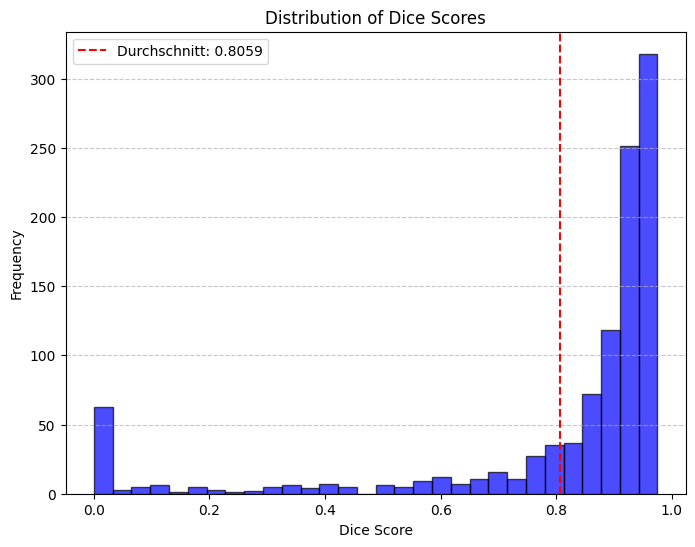

In [2]:
# --- 4. Dice Score Distribution plotten ---
import pandas as pd
import matplotlib.pyplot as plt

csv_path = "data/Spleen/dice_scores_total_segmentator.csv"

# CSV laden
df = pd.read_csv(csv_path)

# Mean Dice Score berechnen
mean_dice = df["Dice Score"].mean()
print(f"Mean Dice Score: {mean_dice:.4f}")

# Histogramm plotten
plt.figure(figsize=(8, 6))
plt.hist(df["Dice Score"], bins=30, color='blue', alpha=0.7, edgecolor='black')
plt.title('Distribution of Dice Scores')
plt.xlabel('Dice Score')
plt.ylabel('Frequency')
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Durchschnitt im Histogramm markieren
plt.axvline(mean_dice, color='red', linestyle='dashed', linewidth=1.5, label=f'Durchschnitt: {mean_dice:.4f}')
plt.legend()

# Plot speichern und anzeigen
plt.savefig('data/Spleen/dice_score_histogram_Total_segmentator_Spleen.png', dpi=300, bbox_inches='tight')
plt.show()
